In [1]:
# %pip install mplcyberpunk
%pip install ruts
%pip install shap
%pip install pymystem3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install slovnet

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install evaluate
%pip install rouge_score

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install crosslingual-coreference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.2/594.2 kB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.2/463.2 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [4]:
%pip install spacy
%pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.7.0/ru_core_news_sm-3.7.0.tar.gz

Note: you may need to restart the kernel to use updated packages.
  Using cached https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.7.0/ru_core_news_sm-3.7.0.tar.gz (15.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
# import mplcyberpunk
import pandas as pd 
import collections
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from pymystem3 import Mystem
from tqdm import tqdm
import csv

from ruts import BasicStats, ReadabilityStats, DiversityStats
from dataclasses import dataclass, field
from typing import List

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
russian_stopwords = set(stopwords.words('russian'))

from navec import Navec
from slovnet import NER, Morph
from razdel import sentenize, tokenize

from evaluate import load

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/irinanovikova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/irinanovikova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
plt.style.use("cyberpunk")

OSError: 'cyberpunk' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## **Preprocessing**

In [7]:
equal_themes_df = pd.read_csv('essays/academic_essays.csv', encoding='utf-8')
different_themes_df = pd.read_csv('essays/academic_essays_with_different_themes.csv', encoding='utf-8')

In [8]:
equal_themes_df.info(), different_themes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   topic               1485 non-null   object
 1   human-written text  1485 non-null   object
 2   prompt              1485 non-null   object
 3   neural text         1485 non-null   object
dtypes: object(4)
memory usage: 46.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   topic               743 non-null    object
 1   human-written text  743 non-null    object
 2   prompt              743 non-null    object
 3   neural text         743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB


(None, None)

In [9]:
equal_themes_df.head()

,topic,human-written text,prompt,neural text
0,"Анализ проблемы популярной культуры, воспроизв...","\nГоворя о современной культуре, мы зачастую п...","Напиши человекоподобное эссе по данной теме: ""...","В течение нескольких десятилетий, популярная к..."
1,Модель Портера,\n\nДанное эссе посвящено известной модели Пор...,"Напиши человекоподобное эссе по данной теме: ""...","В современном мире бизнеса, модель Портера явл..."
2,В чем смысл жизни,\n Жизнь имеет в точности ту це...,"Напиши человекоподобное эссе по данной теме: ""...",В чем смысл жизни? Этот вопрос мучает и волнуе...
3,Человек. Техника. Природа. Проблема взаимодейс...,\nВлияние техники на человека и ...,"Напиши человекоподобное эссе по данной теме: ""...",Человек. Техника. Природа. Проблема взаимодейс...
4,Эвтаназия. Право человека на уход из жизни,\n Право человека\nна жизнь и достойное сущ...,"Напиши человекоподобное эссе по данной теме: ""...",Эвтаназия. Право человека на уход из жизни\n\n...


In [10]:
different_themes_df.head()

,topic,human-written text,prompt,neural text
0,«Всякая истина рождается как ересь и умирает к...,Английский учёный-агностик XIX века Томас Генр...,"Напиши человекоподобное эссе по данной теме: ""...","В течение нескольких десятилетий, популярная к..."
1,«Я не хочу обносить стенами свой дом или зак...,Индийский писатель и поэт Рабиндранат Тагор го...,"Напиши человекоподобное эссе по данной теме: ""...","В современном мире бизнеса, модель Портера явл..."
2,«Отношение Ницше к христианству»,Он усвоил мотивы всех своих предшественников в...,"Напиши человекоподобное эссе по данной теме: ""...",В чем смысл жизни? Этот вопрос мучает и волнуе...
3,«Значение и роль информации в развитии совреме...,"Так, автор выделил ряд критериев, на которые о...","Напиши человекоподобное эссе по данной теме: ""...",Человек. Техника. Природа. Проблема взаимодейс...
4,«Что вы считаете прекрасным и почему?»,Почему же именно любовь? Адам Дж. Джексон сказ...,"Напиши человекоподобное эссе по данной теме: ""...",Эвтаназия. Право человека на уход из жизни\n\n...


In [11]:
lengths_human_texts = [len(text.split(' ')) for text in equal_themes_df['human-written text']]
lengths_neural_texts = [len(text.split(' ')) for text in equal_themes_df['neural text']]
np.sum(lengths_human_texts), np.sum(lengths_neural_texts)

(1120323, 516119)

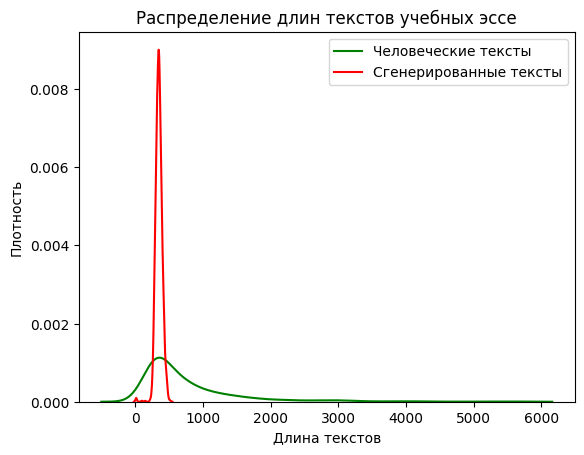

In [121]:
sns.kdeplot(lengths_human_texts, color='green', label='Человеческие тексты')
sns.kdeplot(lengths_neural_texts, color='red', label='Сгенерированные тексты')
plt.xlabel('Длина текстов')
plt.ylabel('Плотность')
plt.title('Распределение длин текстов учебных эссе')
plt.legend()
plt.savefig('text_lengths_distribution')
plt.show()

In [12]:
class DatasetPreprocessor:
    def __init__(self, dataframe, source: str, target: str):
        self.df = dataframe
        self.source_column = source
        self.target_column = target

    def analyse_dataset(self):
        print(self.df.head())
        print(self.df.info())
        print(f'Shape: {self.df.shape}')
        print(f'Number of NaN: {self.df.isnull().sum()}')
        print(f'Number of duplicates: {self.df.duplicated().sum()}')

    def basic_preprocess(self):
        self.df.dropna(axis=0, inplace=True)
        self.df.drop_duplicates(f'{self.source_column}', inplace=True)
        self.df.drop_duplicates(f'{self.target_column}', inplace=True)
        self.df.reset_index(inplace=True, drop=True)
        return self.df

    def remove_garbage(self, text: str):
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'\n', '', text)
        return text

In [13]:
preprocessor_equal = DatasetPreprocessor(equal_themes_df, 'human-written text', 'neural text')
processed_equal_df = preprocessor_equal.basic_preprocess()

cleaned_human_equal = [preprocessor_equal.remove_garbage(text) for text in processed_equal_df['human-written text']]
human_equal = {'text': cleaned_human_equal, 'class': 0}
human_equal_df = pd.DataFrame(human_equal)

cleaned_neural_equal = [preprocessor_equal.remove_garbage(text) for text in processed_equal_df['neural text']]
neural_equal = {'text': cleaned_neural_equal, 'class': 1}
neural_equal_df = pd.DataFrame(neural_equal)

equal_df = pd.concat([human_equal_df, neural_equal_df])
equal_df.head()

,text,class
0,"Говоря о современной культуре, мы зачастую по...",0
1,Данное эссе посвящено известной модели Портер...,0
2,"Жизнь имеет в точности ту ценность, которой м...",0
3,Влияние техники на человека и общество в цело...,0
4,Право человека на жизнь и достойное существов...,0


In [14]:
preprocessor_different = DatasetPreprocessor(different_themes_df, 'human-written text', 'neural text')
processed_different_df = preprocessor_different.basic_preprocess()

cleaned_human_equal = [preprocessor_different.remove_garbage(text) for text in processed_different_df['human-written text']]
human_different = {'text': cleaned_human_equal, 'class': 0}
human_different_df = pd.DataFrame(human_different)

cleaned_neural_different = [preprocessor_different.remove_garbage(text) for text in processed_different_df['neural text']]
neural_different = {'text': cleaned_neural_different, 'class': 1}
neural_different_df = pd.DataFrame(neural_different)

different_df = pd.concat([human_different_df, neural_different_df])
different_df.head()

,text,class
0,Английский учёный-агностик XIX века Томас Генр...,0
1,Индийский писатель и поэт Рабиндранат Тагор го...,0
2,Он усвоил мотивы всех своих предшественников в...,0
3,"Так, автор выделил ряд критериев, на которые о...",0
4,Почему же именно любовь? Адам Дж. Джексон сказ...,0


In [15]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2910 entries, 0 to 1454
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2910 non-null   object
 1   class   2910 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 739
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1480 non-null   object
 1   class   1480 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.7+ KB


(None, None)

In [16]:
long_mask_different = different_df['text'].apply(lambda x: len(x.split(' ')) >= 2000)
different_df = different_df[~long_mask_different]

small_mask_different = different_df['text'].apply(lambda x: len(x.split(' ')) <= 200)
different_df = different_df[~small_mask_different]

different_df.reset_index(inplace=True, drop=True)

long_mask_equal = equal_df['text'].apply(lambda x: len(x.split(' ')) >= 2000)
equal_df = equal_df[~long_mask_equal]

small_mask_equal = equal_df['text'].apply(lambda x: len(x.split(' ')) <= 200)
equal_df = equal_df[~small_mask_equal]

equal_df.reset_index(inplace=True, drop=True)

In [17]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2709 non-null   object
 1   class   2709 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1356 non-null   object
 1   class   1356 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 21.3+ KB


(None, None)

## **Bigrams and trigrams**

In [29]:
def get_word_corpus(df):
    corpus = []
    for text in df.text:
        text = [token.lower() for token in text.split() if token.isalpha()]
        corpus.extend(text)
    return corpus

In [132]:
def get_n_grams(corpus, n_gram_size): 
    n_grams = []
    for ind in range(len(corpus) - n_gram_size + 1):
        n_grams.append(corpus[ind:ind + n_gram_size])
    return tuple(n_grams)

In [133]:
def get_probabilities(n_grams):
    n_gram_counts = {}
    for n_gram in n_grams:
        n_gram_counts[n_gram] = n_gram_counts.get(n_gram, 0) + 1

    base_ngram_counts = {}
    for ngram, freq in n_gram_counts.items():
        base_ngram_counts[ngram[:-1]] = base_ngram_counts.get(ngram[:-1], 0) + freq

    n_gram_frequencies = {ngram: freq / base_ngram_counts[ngram[:-1]]
                                    for ngram, freq in n_gram_counts.items()}
    return n_gram_frequencies

In [135]:
human_df = equal_df[equal_df["class"] == 0]
neural_df = equal_df[equal_df["class"] == 1]

In [157]:
bigram_probs_human = get_probabilities(get_n_grams(tuple(get_word_corpus(human_df)), 2))
bigram_probs_neural = get_probabilities(get_n_grams(tuple(get_word_corpus(neural_df)), 2))

In [158]:
list(bigram_probs_neural.items())[:10]

[(('в', 'течение'), 0.004054146911289768),
 (('течение', 'нескольких'), 0.06666666666666667),
 (('нескольких', 'популярная'), 0.043478260869565216),
 (('популярная', 'культура'), 1.0),
 (('культура', 'стала'), 0.013793103448275862),
 (('стала', 'важной'), 0.01),
 (('важной', 'сферой'), 0.007874015748031496),
 (('сферой', 'в'), 0.2857142857142857),
 (('в', 'нашей'), 0.019995877138734283),
 (('нашей', 'она'), 0.03996366939146231)]

In [145]:
list(bigram_probs_human.items())[:10]

[(('данное', 'эссе'), 0.011904761904761904),
 (('эссе', 'посвящено'), 0.020833333333333332),
 (('посвящено', 'известной'), 0.058823529411764705),
 (('известной', 'модели'), 0.058823529411764705),
 (('модели', 'описанной'), 0.013513513513513514),
 (('описанной', 'им'), 0.14285714285714285),
 (('им', 'в'), 0.06601941747572816),
 (('в', 'в'), 0.011577258138468592),
 (('в', 'данной'), 0.0024835702277242857),
 (('данной', 'работе'), 0.04245283018867924)]

In [148]:
trigram_probs_human = get_probabilities(get_n_grams(tuple(get_word_corpus(human_df)), 3))
trigram_probs_neural = get_probabilities(get_n_grams(tuple(get_word_corpus(neural_df)), 3))

In [126]:
from scipy.stats import ks_2samp

In [147]:
# Kolmogorov-Smirnov bigrams 
ks_2samp(list(bigram_probs_human.values()), list(bigram_probs_neural.values()))

KstestResult(statistic=0.031312792907284726, pvalue=1.2432014292485e-107, statistic_location=0.07954545454545454, statistic_sign=-1)

In [149]:
ks_2samp(list(trigram_probs_human.values()), list(trigram_probs_neural.values()))

KstestResult(statistic=0.13398908906808243, pvalue=0.0, statistic_location=0.66, statistic_sign=-1)

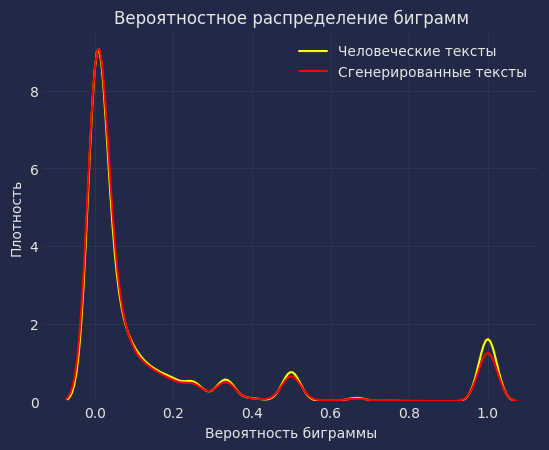

In [167]:
sns.kdeplot(list(bigram_probs_human.values()), color='yellow', label='Человеческие тексты')
sns.kdeplot(list(bigram_probs_neural.values()), color='red', label='Сгенерированные тексты')
plt.xlabel('Вероятность биграммы')
plt.ylabel('Плотность')
plt.title('Вероятностное распределение биграмм')
plt.legend()
plt.show()

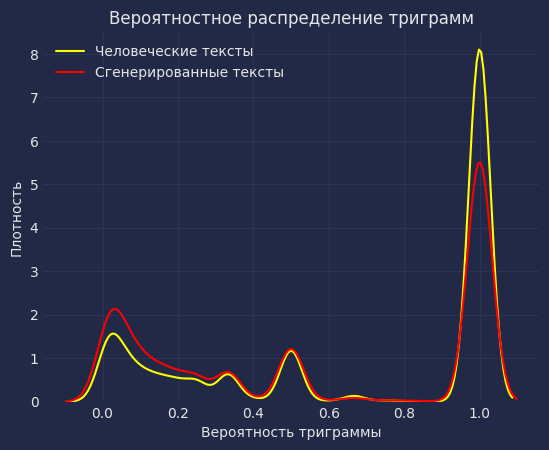

In [181]:
sns.kdeplot(np.array(list(trigram_probs_human.values())), color='yellow', label='Человеческие тексты')
sns.kdeplot(np.array(list(trigram_probs_neural.values())), color='red', label='Сгенерированные тексты')
plt.xlabel('Вероятность триграммы')
plt.ylabel('Плотность')
plt.title('Вероятностное распределение триграмм')
plt.legend()
plt.show()

## **Letter bigrams and trigrams**

In [30]:
def get_word_corpus(df):
    corpus = []
    for text in df.text:
        text = [token.lower() for token in text if token.isalpha()]
        corpus.append(text)
    return corpus

def get_ngrams_distribution(df, corpus, n_gram_size): 
    n_grams = {index: [] for index in range(len(df.text))}
    for index in range(len(df.text)): 
        current_corpus = corpus[index]
        for ind in range(len(current_corpus) - n_gram_size + 1): 
            n_grams[index].append(current_corpus[ind:ind + n_gram_size])
    return n_grams

def get_probabilities(df, n_grams_corpus):
    n_gram_counts = {index: [] for index in range(len(df.text))}
    for index in range(len(df.text)): 
        one_text_ngrams = n_grams_corpus[index]
        one_text_n_grams_count = {}
        for n_gram in one_text_ngrams: 
            one_text_n_grams_count[tuple(n_gram)] = one_text_n_grams_count.get(tuple(n_gram), 0) + 1
        
        one_text_base_ngram_counts = {}
        for ngram, freq in one_text_n_grams_count.items():
            one_text_base_ngram_counts[tuple(ngram[:-1])] = one_text_base_ngram_counts.get(tuple(ngram[:-1]), 0) + freq

        one_text_n_gram_frequencies = {tuple(ngram): freq / one_text_base_ngram_counts[tuple(ngram[:-1])]
                                    for ngram, freq in one_text_n_grams_count.items()}
        
        n_gram_counts[index] = one_text_n_gram_frequencies.values()

    return n_gram_counts

In [31]:
equal_corpus = get_word_corpus(equal_df)
different_corpus = get_word_corpus(different_df)

In [48]:
equal_bigrams = get_ngrams_distribution(equal_df, equal_corpus, 2)
different_bigrams = get_ngrams_distribution(different_df, different_corpus, 2)

In [ ]:
equal_trigrams = get_ngrams_distribution(equal_df, equal_corpus, 3)
different_trigrams = get_ngrams_distribution(different_df, different_corpus, 3)

In [56]:
equal_probabilities_bigrams = get_probabilities(equal_df, list(equal_bigrams.values()))
equal_probabilities_trigrams = get_probabilities(equal_df, list(equal_trigrams.values()))

different_probabilities_bigrams = get_probabilities(different_df, list(different_bigrams.values()))
different_probabilities_trigrams = get_probabilities(different_df, list(different_trigrams.values()))

In [ ]:
from scipy.stats import ks_2samp, entropy

In [ ]:
# entropy for bigrams 
entropy(list(bigram_probs_human.values())), entropy(list(bigram_probs_neural.values()))

In [ ]:
# Kolmogorov-Smirnov bigrams 
ks_2samp(list(bigram_probs_human.values()), list(bigram_probs_neural.values()))

## **Basic statistics**

In [18]:
@dataclass
class TextStatsCollection:
    n_letters: List[int] = field(default_factory=list)
    n_syllables: List[int] = field(default_factory=list)
    n_words: List[int] = field(default_factory=list)
    n_words_per_sentence: List[float] = field(default_factory=list)
    n_simple_words: List[int] = field(default_factory=list)
    n_simple_words_per_sentence: List[float] = field(default_factory=list)
    n_monosyllable_words: List[int] = field(default_factory=list)
    n_monosyllable_words_per_sentence: List[float] = field(default_factory=list)
    n_polysyllable_words: List[int] = field(default_factory=list)
    n_polysyllable_words_per_sentence: List[float] = field(default_factory=list)
    n_long_words: List[int] = field(default_factory=list)
    n_long_words_per_sentence: List[float] = field(default_factory=list)
    n_complex_words: List[int] = field(default_factory=list)
    n_complex_words_per_sentence: List[float] = field(default_factory=list)
    n_unique_words_per_sentence: List[float] = field(default_factory=list)
    n_sents: List[int] = field(default_factory=list)
    n_punctuations: List[int] = field(default_factory=list)
    n_punctuations_per_sentence: List[float] = field(default_factory=list)

In [19]:
def get_statistics(df):
    stats = TextStatsCollection()
    
    for text in df.text: 
        bs = BasicStats(text)
        stats.n_letters.append(bs.n_letters / bs.n_words)
        stats.n_syllables.append(bs.n_syllables / bs.n_words)
        stats.n_words.append(bs.n_words)
        stats.n_words_per_sentence.append(bs.n_words / bs.n_sents)
        stats.n_simple_words.append(bs.n_simple_words / bs.n_words)
        stats.n_simple_words_per_sentence.append(bs.n_simple_words / bs.n_sents)
        stats.n_monosyllable_words.append(bs.n_monosyllable_words / bs.n_words)
        stats.n_monosyllable_words_per_sentence.append(bs.n_monosyllable_words / bs.n_sents)
        stats.n_polysyllable_words.append(bs.n_polysyllable_words / bs.n_words)
        stats.n_polysyllable_words_per_sentence.append(bs.n_polysyllable_words / bs.n_sents)
        stats.n_long_words.append(bs.n_long_words / bs.n_words)
        stats.n_long_words_per_sentence.append(bs.n_long_words / bs.n_sents)
        stats.n_complex_words.append(bs.n_complex_words / bs.n_words)
        stats.n_complex_words_per_sentence.append(bs.n_complex_words / bs.n_sents)
        stats.n_unique_words_per_sentence.append(bs.n_unique_words / bs.n_sents)
        stats.n_sents.append(bs.n_sents / bs.n_words)
        stats.n_punctuations.append(bs.n_punctuations / bs.n_words)
        stats.n_punctuations_per_sentence.append(bs.n_punctuations / bs.n_sents)
    
    return stats

In [20]:
statistics_equal = get_statistics(equal_df)
statistics_different = get_statistics(different_df)

In [21]:
# Basic statistics for equal thematics
equal_df['n_letters'] = statistics_equal.n_letters
equal_df['n_syllables'] = statistics_equal.n_syllables
equal_df['n_words'] = statistics_equal.n_words
equal_df['n_words_per_sentence'] = statistics_equal.n_words_per_sentence
equal_df['n_simple_words'] = statistics_equal.n_simple_words
equal_df['n_simple_words_per_sentence'] = statistics_equal.n_simple_words_per_sentence
equal_df['n_monosyllable_words'] = statistics_equal.n_monosyllable_words
equal_df['n_monosyllable_words_per_sentence'] = statistics_equal.n_monosyllable_words_per_sentence
equal_df['n_polysyllable_words'] = statistics_equal.n_polysyllable_words
equal_df['n_polysyllable_words_per_sentence'] = statistics_equal.n_polysyllable_words_per_sentence
equal_df['n_long_words'] = statistics_equal.n_long_words
equal_df['n_long_words_per_sentence'] = statistics_equal.n_long_words_per_sentence
equal_df['n_complex_words'] = statistics_equal.n_complex_words
equal_df['n_complex_words_per_sentence'] = statistics_equal.n_complex_words_per_sentence
equal_df['n_unique_words_per_sentence'] = statistics_equal.n_unique_words_per_sentence
equal_df['n_sents'] = statistics_equal.n_sents
equal_df['n_punctuations'] = statistics_equal.n_punctuations
equal_df['n_punctuations_per_sentence'] = statistics_equal.n_punctuations_per_sentence

In [22]:
# Basic statistics for different thematics
different_df['n_letters'] = statistics_different.n_letters
different_df['n_syllables'] = statistics_different.n_syllables
different_df['n_words'] = statistics_different.n_words
different_df['n_words_per_sentence'] = statistics_different.n_words_per_sentence
different_df['n_simple_words'] = statistics_different.n_simple_words
different_df['n_simple_words_per_sentence'] = statistics_different.n_simple_words_per_sentence
different_df['n_monosyllable_words'] = statistics_different.n_monosyllable_words
different_df['n_monosyllable_words_per_sentence'] = statistics_different.n_monosyllable_words_per_sentence
different_df['n_polysyllable_words'] = statistics_different.n_polysyllable_words
different_df['n_polysyllable_words_per_sentence'] = statistics_different.n_polysyllable_words_per_sentence
different_df['n_long_words'] = statistics_different.n_long_words
different_df['n_long_words_per_sentence'] = statistics_different.n_long_words_per_sentence
different_df['n_complex_words'] = statistics_different.n_complex_words
different_df['n_complex_words_per_sentence'] = statistics_different.n_complex_words_per_sentence
different_df['n_unique_words_per_sentence'] = statistics_different.n_unique_words_per_sentence
different_df['n_sents'] = statistics_different.n_sents
different_df['n_punctuations'] = statistics_different.n_punctuations
different_df['n_punctuations_per_sentence'] = statistics_different.n_punctuations_per_sentence

In [23]:
equal_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,n_polysyllable_words,n_polysyllable_words_per_sentence,n_long_words,n_long_words_per_sentence,n_complex_words,n_complex_words_per_sentence,n_unique_words_per_sentence,n_sents,n_punctuations,n_punctuations_per_sentence
0,Данное эссе посвящено известной модели Портер...,0,5.632653,2.369202,539,22.458333,0.599258,13.458333,0.189239,4.250000,0.664193,14.916667,0.565863,12.708333,0.254174,5.708333,14.583333,0.044527,0.196660,4.416667
1,"Жизнь имеет в точности ту ценность, которой м...",0,4.690751,1.898844,346,10.484848,0.852601,8.939394,0.369942,3.878788,0.580925,6.090909,0.343931,3.606061,0.098266,1.030303,6.727273,0.095376,0.228324,2.393939
2,Влияние техники на человека и общество в цело...,0,6.432456,2.780702,1140,17.014925,0.600000,10.208955,0.200000,3.402985,0.728947,12.402985,0.588596,10.014925,0.328947,5.597015,10.761194,0.058772,0.225439,3.835821
3,Конституция была принята в 1993 году. Какие ж...,0,5.857895,2.528070,570,17.812500,0.705263,12.562500,0.254386,4.531250,0.682456,12.156250,0.494737,8.812500,0.231579,4.125000,10.656250,0.056140,0.175439,3.125000
4,В первую очередь стоит дать определение некот...,0,6.329204,2.729204,565,12.555556,0.635398,7.977778,0.164602,2.066667,0.775221,9.733333,0.594690,7.466667,0.304425,3.822222,8.422222,0.079646,0.244248,3.066667


In [24]:
different_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,n_polysyllable_words,n_polysyllable_words_per_sentence,n_long_words,n_long_words_per_sentence,n_complex_words,n_complex_words_per_sentence,n_unique_words_per_sentence,n_sents,n_punctuations,n_punctuations_per_sentence
0,Английский учёный-агностик XIX века Томас Генр...,0,6.072917,2.655093,864,15.157895,0.679398,10.298246,0.223380,3.385965,0.728009,11.035088,0.552083,8.368421,0.271991,4.122807,9.333333,0.065972,0.223380,3.385965
1,Индийский писатель и поэт Рабиндранат Тагор го...,0,6.052317,2.544096,669,18.081081,0.675635,12.216216,0.242152,4.378378,0.695067,12.567568,0.527653,9.540541,0.261584,4.729730,11.864865,0.055306,0.198804,3.594595
2,"Так, автор выделил ряд критериев, на которые о...",0,5.644753,2.433628,791,28.250000,0.690265,19.500000,0.289507,8.178571,0.643489,18.178571,0.489254,13.821429,0.242731,6.857143,14.571429,0.035398,0.197219,5.571429
3,Почему же именно любовь? Адам Дж. Джексон сказ...,0,5.013158,2.105263,228,15.200000,0.802632,12.200000,0.293860,4.466667,0.657895,10.000000,0.385965,5.866667,0.149123,2.266667,10.533333,0.065789,0.223684,3.400000
4,"Смысл этого высказывания заключается в том, чт...",0,6.492877,2.860399,351,20.647059,0.609687,12.588235,0.185185,3.823529,0.749288,15.470588,0.589744,12.176471,0.324786,6.705882,15.352941,0.048433,0.239316,4.941176


## **Readability scores**

In [25]:
def get_readability_scores(df):
    flesch_kincaid_grade = []
    flesch_reading_easy = []
    # coleman_liau_index = []
    # smog_index = []
    # automated_readability_index = []
    # lix = []

    for index in range(len(df.text)):
        rs = ReadabilityStats(df.text.iloc[index])
        flesch_kincaid_grade.append(rs.flesch_kincaid_grade)
        flesch_reading_easy.append(rs.flesch_reading_easy)
        # coleman_liau_index.append(rs.coleman_liau_index)
        # smog_index.append(rs.smog_index)
        # automated_readability_index.append(rs.automated_readability_index)
        # lix.append(rs.lix)
    return flesch_kincaid_grade, flesch_reading_easy

In [26]:
readability_scores_equal = get_readability_scores(equal_df)
readability_scores_different = get_readability_scores(different_df)

In [27]:
# Readability scores fot equal thematics
equal_df['flesch_kincaid_grade'] = readability_scores_equal[0]
equal_df['flesch_reading_easy'] = readability_scores_equal[1]
# equal_df['coleman_liau_index'] = readability_scores_equal[2]
# equal_df['smog_index'] = readability_scores_equal[3]
# equal_df['automated_readability_index'] = readability_scores_equal[4]
# equal_df['lix'] = readability_scores_equal[5]

In [28]:
# Readability scores fot different thematics
different_df['flesch_kincaid_grade'] = readability_scores_different[0]
different_df['flesch_reading_easy'] = readability_scores_different[1]
# different_df['coleman_liau_index'] = readability_scores_different[2]
# different_df['smog_index'] = readability_scores_different[3]
# different_df['automated_readability_index'] = readability_scores_different[4]
# different_df['lix'] = readability_scores_different[5]

In [29]:
equal_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,...,n_long_words,n_long_words_per_sentence,n_complex_words,n_complex_words_per_sentence,n_unique_words_per_sentence,n_sents,n_punctuations,n_punctuations_per_sentence,flesch_kincaid_grade,flesch_reading_easy
0,Данное эссе посвящено известной модели Портер...,0,5.632653,2.369202,539,22.458333,0.599258,13.458333,0.189239,4.250000,...,0.565863,12.708333,0.254174,5.708333,14.583333,0.044527,0.196660,4.416667,11.709760,35.250113
1,"Жизнь имеет в точности ту ценность, которой м...",0,4.690751,1.898844,346,10.484848,0.852601,8.939394,0.369942,3.878788,...,0.343931,3.606061,0.098266,1.030303,6.727273,0.095376,0.228324,2.393939,2.409136,79.084177
2,Влияние техники на человека и общество в цело...,0,6.432456,2.780702,1140,17.014925,0.600000,10.208955,0.200000,3.402985,...,0.588596,10.014925,0.328947,5.597015,10.761194,0.058772,0.225439,3.835821,12.046436,17.595422
3,Конституция была принята в 1993 году. Какие ж...,0,5.857895,2.528070,570,17.812500,0.705263,12.562500,0.254386,4.531250,...,0.494737,8.812500,0.231579,4.125000,10.656250,0.056140,0.175439,3.125000,10.593037,31.741732
4,В первую очередь стоит дать определение некот...,0,6.329204,2.729204,565,12.555556,0.635398,7.977778,0.164602,2.066667,...,0.594690,7.466667,0.304425,3.822222,8.422222,0.079646,0.244248,3.066667,9.485408,26.487645


In [30]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

(None, None)

## **Lexical diversity scores**

In [31]:
def get_lexical_diversity_scores(df):
    mtld = []
    hdd = []

    for index in range(len(df.text)):
        ds = DiversityStats(df.text.iloc[index])
        mtld.append(ds.mtld)
        hdd.append(ds.hdd)
    return mtld, hdd

In [32]:
lexical_diversity_equal = get_lexical_diversity_scores(equal_df)
lexical_diversity_different = get_lexical_diversity_scores(different_df)

In [33]:
# Lexical diversity scores fot equal thematics
equal_df['mtld'] = lexical_diversity_equal[0]
equal_df['hdd'] = lexical_diversity_equal[1]

In [34]:
# Lexical diversity scores fot different thematics
different_df['mtld'] = lexical_diversity_different[0]
different_df['hdd'] = lexical_diversity_different[1]

In [35]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

(None, None)

## **Repetitiveness**

In [36]:
most_frequent_words_df = pd.read_csv('most_frequent_russian_words.csv', encoding='utf-8')
most_frequent_words = most_frequent_words_df['Лемма']

In [42]:
punctuation_marks = ['.', ',', '?', '!', ';', ':', "'", '"', '(', ')', '[', ']', '{', '}', '-', '–', '—', '/', '\\', '*', '&', '%', '$', '#', '@', '+', '=', '<', '>', '|', '~', '^', '`']

def lemmatize(df):
    lemmatized_corpora = []
    mystem = Mystem()
    for text in df.text:
        lemmas = mystem.lemmatize(text)
        lemmatized_text = ''.join(lemmas)
        lemmatized_corpora.append(lemmatized_text)
    df['lemmatized_text'] = lemmatized_corpora
    return df


def get_unique_words(df):
    number_unique_words = {}
    for index in range(len(df.lemmatized_text)):
        text = df.lemmatized_text.iloc[index]
        freq_per_text = {}
        tokens = tokenize(text)
        for token in tokens:
            if token.text in punctuation_marks:
                continue
            elif token.text not in freq_per_text:
                freq_per_text[token.text] = 0
            freq_per_text[token.text] += 1
        number_unique_words[index] = len(freq_per_text.keys()) / df.n_words.iloc[index]
    return number_unique_words

def get_top_list_words(df):
    counter_dict = {index: 0 for index in range(len(df.text))}
    for index in tqdm(range(len(df.lemmatized_text))):
        text = df.lemmatized_text.iloc[index]
        tokens = text.split(' ')
        for word in most_frequent_words:
            if word in tokens:
                counter_dict[index] += 1 / df.n_words.iloc[index]
    return counter_dict

def get_number_of_stop_words(df): 
    counter_dict = {index: 0 for index in range(len(df.text))}
    for index in tqdm(range(len(df.lemmatized_text))):
        text = df.lemmatized_text.iloc[index]
        tokens = tokenize(text)
        for token in tokens:
            if token.text in russian_stopwords:
                counter_dict[index] += 1 / df.n_words.iloc[index]
    return counter_dict

def get_number_of_unique_stop_words(df): 
    counter_dict = {index: 0 for index in range(len(df.text))}
    for index in tqdm(range(len(df.lemmatized_text))):
        text = df.lemmatized_text.iloc[index]
        tokens = tokenize(text)
        unique_stop_words = {}
        for token in tokens:
            if token.text in russian_stopwords: 
                if token.text not in unique_stop_words:
                    unique_stop_words[token.text] = 0
                unique_stop_words[token.text] += 1
        counter_dict[index] = len(unique_stop_words.keys()) / df.n_words.iloc[index]
    return counter_dict

In [38]:
equal_df = lemmatize(equal_df)
different_df = lemmatize(different_df)

In [46]:
equal_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,...,n_punctuations_per_sentence,flesch_kincaid_grade,flesch_reading_easy,mtld,hdd,lemmatized_text,number_of_unique_words,number_of_top_list_words,number_of_stop_words,number_of_unique_stop_words
0,Данное эссе посвящено известной модели Портер...,0,5.632653,2.369202,539,22.458333,0.599258,13.458333,0.189239,4.250000,...,4.416667,11.709760,35.250113,258.228466,0.922832,данный эссе посвящать известный модель портер...,0.539889,0.411874,0.254174,0.070501
1,"Жизнь имеет в точности ту ценность, которой м...",0,4.690751,1.898844,346,10.484848,0.852601,8.939394,0.369942,3.878788,...,2.393939,2.409136,79.084177,186.170569,0.895450,"жизнь иметь в точность тот ценность, который ...",0.523121,0.462428,0.456647,0.141618
2,Влияние техники на человека и общество в цело...,0,6.432456,2.780702,1140,17.014925,0.600000,10.208955,0.200000,3.402985,...,3.835821,12.046436,17.595422,422.288336,0.925079,влияние техника на человек и общество в целое...,0.498246,0.387719,0.298246,0.050000
3,Конституция была принята в 1993 году. Какие ж...,0,5.857895,2.528070,570,17.812500,0.705263,12.562500,0.254386,4.531250,...,3.125000,10.593037,31.741732,172.712902,0.906734,конституция быть принимать в 1993 год. какой ...,0.468421,0.443860,0.359649,0.096491
4,В первую очередь стоит дать определение некот...,0,6.329204,2.729204,565,12.555556,0.635398,7.977778,0.164602,2.066667,...,3.066667,9.485408,26.487645,321.735765,0.927198,в первый очередь стоить давать определение не...,0.527434,0.438938,0.281416,0.083186


In [45]:
equal_df.drop(['number_of_most_frequent_words'], axis=1, inplace=True)
equal_df.reset_index(drop=True, inplace=True)

In [43]:
equal_df['number_of_unique_words'] = get_unique_words(equal_df)
equal_df['number_of_top_list_words'] = get_top_list_words(equal_df)
equal_df['number_of_stop_words'] = get_number_of_stop_words(equal_df)
equal_df['number_of_unique_stop_words'] = get_number_of_unique_stop_words(equal_df)

100%|██████████| 2709/2709 [00:02<00:00, 982.16it/s] 


In [47]:
different_df['number_of_unique_words'] = get_unique_words(different_df)
different_df['number_of_top_list_words'] = get_top_list_words(different_df)
different_df['number_of_stop_words'] = get_number_of_stop_words(different_df)
different_df['number_of_unique_stop_words'] = get_number_of_unique_stop_words(different_df)

100%|██████████| 1356/1356 [00:01<00:00, 870.67it/s] 


In [48]:
equal_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,...,n_punctuations_per_sentence,flesch_kincaid_grade,flesch_reading_easy,mtld,hdd,lemmatized_text,number_of_unique_words,number_of_top_list_words,number_of_stop_words,number_of_unique_stop_words
0,Данное эссе посвящено известной модели Портер...,0,5.632653,2.369202,539,22.458333,0.599258,13.458333,0.189239,4.250000,...,4.416667,11.709760,35.250113,258.228466,0.922832,данный эссе посвящать известный модель портер...,0.539889,0.411874,0.254174,0.070501
1,"Жизнь имеет в точности ту ценность, которой м...",0,4.690751,1.898844,346,10.484848,0.852601,8.939394,0.369942,3.878788,...,2.393939,2.409136,79.084177,186.170569,0.895450,"жизнь иметь в точность тот ценность, который ...",0.523121,0.462428,0.456647,0.141618
2,Влияние техники на человека и общество в цело...,0,6.432456,2.780702,1140,17.014925,0.600000,10.208955,0.200000,3.402985,...,3.835821,12.046436,17.595422,422.288336,0.925079,влияние техника на человек и общество в целое...,0.498246,0.387719,0.298246,0.050000
3,Конституция была принята в 1993 году. Какие ж...,0,5.857895,2.528070,570,17.812500,0.705263,12.562500,0.254386,4.531250,...,3.125000,10.593037,31.741732,172.712902,0.906734,конституция быть принимать в 1993 год. какой ...,0.468421,0.443860,0.359649,0.096491
4,В первую очередь стоит дать определение некот...,0,6.329204,2.729204,565,12.555556,0.635398,7.977778,0.164602,2.066667,...,3.066667,9.485408,26.487645,321.735765,0.927198,в первый очередь стоить давать определение не...,0.527434,0.438938,0.281416,0.083186


In [49]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

(None, None)

## **NER**

In [50]:
class NERMarkuper:
    def __init__(self, df):
        self.df = df
        navec = Navec.load('vocab/navec_news_v1_1B_250K_300d_100q.tar')
        self.ner = NER.load('vocab/slovnet_ner_news_v1.tar')
        self.ner.navec(navec)

    def get_ners(self):
        unique_ner = {}
        number_of_ner_per_text = {}
        for index in tqdm(range(len(self.df.text))):
            text = self.df.text[index]
            unique_ner_per_text = {}
            unique_ner_type_per_text = {}
            markup = self.ner(text)
            for span in markup.spans:
                if text[span.start:span.stop] not in unique_ner_per_text:
                    unique_ner_per_text[text[span.start:span.stop]] = 0
                unique_ner_per_text[text[span.start:span.stop]] += 1

            for span in markup.spans:
                if span.type not in unique_ner_type_per_text:
                    unique_ner_type_per_text[span.type] = 0
                unique_ner_type_per_text[span.type] += 1

            unique_ner[index] = len(unique_ner_per_text.keys()) / self.df.n_words.iloc[index] # количество уникальных текстовых неров в тексте: Миша, Маша, Саша
            number_of_ner_per_text[index] = sum(list(unique_ner_type_per_text.values())) / self.df.n_words.iloc[index]  # общее количество неров в тексте 

        return unique_ner, number_of_ner_per_text

    def get_mean_ner_per_sentence(self):
        mean_ner_per_sentence = []
        for index in tqdm(range(len(self.df.text))):
            text = self.df.text[index]
            number_of_ner = []
            sentenized_text = list(sentenize(text))
            for sentence in sentenized_text:
                sentence = sentence.text
                markup = self.ner(sentence)
                number_of_ner.append(len(markup.spans))
            mean_ner_per_sentence.append(np.mean(number_of_ner))
        return mean_ner_per_sentence # среднее количество неров в тексте из расчета на предложение

In [51]:
ner_markuper_equal = NERMarkuper(equal_df)
ners_equal = ner_markuper_equal.get_ners()

equal_df['unique_ner'] = ners_equal[0]
equal_df['number_of_ner_per_text'] = ners_equal[1]
equal_df['mean_ner_per_sentence'] = ner_markuper_equal.get_mean_ner_per_sentence()

100%|██████████| 2709/2709 [02:00<00:00, 22.50it/s]


In [52]:
ner_markuper_different = NERMarkuper(different_df)
ners_different = ner_markuper_different.get_ners()

different_df['unique_ner'] = ners_different[0]
different_df['number_of_ner_per_text'] = ners_different[1]
different_df['mean_ner_per_sentence'] = ner_markuper_different.get_mean_ner_per_sentence()

100%|██████████| 1356/1356 [01:01<00:00, 22.10it/s]


## **POS**

In [53]:
class POSMarkuper:
    def __init__(self, df):
        self.df = df
        navec = Navec.load('vocab/navec_news_v1_1B_250K_300d_100q.tar')
        self.morph = Morph.load('vocab/slovnet_morph_news_v1.tar', batch_size=4)
        self.morph.navec(navec)
        self.chunks = self.preprocess()

    def preprocess(self):
        all_chunks = []
        for text in self.df.text:
            text_chunks = []
            for sent in sentenize(text):
                tokens = [_.text for _ in tokenize(sent.text)]
                text_chunks.append(tokens)
            all_chunks.append(text_chunks)
        return all_chunks

    def get_morph_stats(self): 
        number_nouns = {i: 0 for i in range(len(self.chunks))}
        number_verbs = {i: 0 for i in range(len(self.chunks))}
        number_adj = {i: 0 for i in range(len(self.chunks))}
        number_pronouns = {i: 0 for i in range(len(self.chunks))}
        number_nums = {i: 0 for i in range(len(self.chunks))}
        for i in range(len(self.chunks)): 
            chunk = self.chunks[i]
            for markup in self.morph.map(chunk): 
                for token in markup.tokens:
                    if token.pos == 'NOUN':
                        number_nouns[i] = number_nouns.get(i, 0) + 1 / self.df.n_words.iloc[i]
                    elif token.pos == 'VERB':
                        number_verbs[i] = number_verbs.get(i, 0) + 1 / self.df.n_words.iloc[i]
                    elif token.pos == 'ADJ':
                        number_adj[i] = number_adj.get(i, 0) + 1 / self.df.n_words.iloc[i]
                    elif token.pos == 'PROPN':
                        number_pronouns[i] = number_pronouns.get(i, 0) + 1 / self.df.n_words.iloc[i]
                    elif token.pos == 'NUM':
                        number_nums[i] = number_nums.get(i, 0) + 1 / self.df.n_words.iloc[i]
        return number_nouns, number_verbs, number_adj, number_pronouns, number_nums

    def get_functional_words(self):
        functional_words_count = []
        for i in range(len(self.chunks)):
            chunk = self.chunks[i]
            functional_words_per_text = 0
            for markup in self.morph.map(chunk): 
                for token in markup.tokens:
                    if token.pos == 'ADP' or token.pos == 'CCONJ' or token.pos == 'PART':
                        functional_words_per_text += 1 / self.df.n_words.iloc[i]
            functional_words_count.append(functional_words_per_text)
        return functional_words_count

In [54]:
morph_markuper_equal = POSMarkuper(equal_df)
morph_markup_equal = morph_markuper_equal.get_morph_stats()

equal_df['number_nouns'] = morph_markup_equal[0]
equal_df['number_verbs'] = morph_markup_equal[1]
equal_df['number_adj'] = morph_markup_equal[2]
equal_df['number_pronouns'] = morph_markup_equal[3]
equal_df['number_nums'] = morph_markup_equal[4]
equal_df['number_of_func_words'] = morph_markuper_equal.get_functional_words()

In [55]:
morph_markuper_different = POSMarkuper(different_df)
morph_markup_different = morph_markuper_different.get_morph_stats()

different_df['number_nouns'] = morph_markup_different[0]
different_df['number_verbs'] = morph_markup_different[1]
different_df['number_adj'] = morph_markup_different[2]
different_df['number_pronouns'] = morph_markup_different[3]
different_df['number_nums'] = morph_markup_different[4]
different_df['number_of_func_words'] = morph_markuper_different.get_functional_words()

In [56]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

(None, None)

## **ROUGE-1, ROUGE-2, ROUGE-L and BLEU**

In [57]:
rouge = load('rouge')

def get_metric(df):
    mystem = Mystem()
    rouge_metrics = []
    rouge_1_metrics = []
    rouge_2_metrics = []
    rouge_l_metrics = []
    for index in tqdm(range(len(df.text))):
        text = df.text.iloc[index]
        sentences = list(sentenize(text))
        predictions = []
        references = []
        for i in range(len(sentences) - 1):
            predictions.append(''.join(mystem.lemmatize(sentences[i].text)[:-2]))
            references.append(''.join(mystem.lemmatize(sentences[i + 1].text)[:-2]))
        rouge_metrics = get_rouge(predictions, references)
        rouge_1_metrics.append(rouge_metrics['rouge1'])
        rouge_2_metrics.append(rouge_metrics['rouge2'])
        rouge_l_metrics.append(rouge_metrics['rougeL'])

    return rouge_1_metrics, rouge_2_metrics, rouge_l_metrics

def get_rouge(predictions, references):
    result = rouge.compute(predictions=predictions, references=references, use_stemmer=False, tokenizer=lambda x: [
                                                token.text.lower() for token in tokenize(x)])
    return result

In [58]:
metrics_equal = get_metric(equal_df)
metrics_different = get_metric(different_df)

100%|██████████| 1356/1356 [01:39<00:00, 13.70it/s]


In [56]:
equal_df_essays = pd.read_csv('equal_essay_all_features.csv')

In [57]:
equal_df['rouge_1'] = equal_df_essays['rouge_1']
equal_df['rouge_2'] = equal_df_essays['rouge_2']
equal_df['rouge_l'] = equal_df_essays['rouge_l']

In [59]:
equal_df['rouge_1'] = metrics_equal[0]
equal_df['rouge_2'] = metrics_equal[1]
equal_df['rouge_l'] = metrics_equal[2]

In [58]:
different_df_essays = pd.read_csv('different_essay_all_features.csv')

In [59]:
different_df['rouge_1'] = different_df_essays['rouge_1']
different_df['rouge_2'] = different_df_essays['rouge_2']
different_df['rouge_l'] = different_df_essays['rouge_l']

In [60]:
different_df['rouge_1'] = metrics_different[0]
different_df['rouge_2'] = metrics_different[1]
different_df['rouge_l'] = metrics_different[2]

In [61]:
equal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

## **Parallel Structures** 

In [62]:
model = spacy.load("ru_core_news_sm")

In [63]:
def make_syntax_markup(df): 
    df_with_markup = {}
    for index in tqdm(range(len(df.text))):
        text_with_markup = []
        text = df.text.iloc[index]
        sentences = list(sentenize(text))
        for sentence in sentences: 
            sentence_with_markup = []
            sentence = model(sentence.text)
            for token in sentence:
                if token.dep_ == 'punct':
                    continue
                else: 
                    sentence_with_markup.append(f'{token.pos_}_{token.dep_}')
            text_with_markup.append(' '.join(sentence_with_markup))
        df_with_markup[index] = text_with_markup
    return df_with_markup

In [64]:
import collections

import numpy as np


class Score(
    collections.namedtuple("Score", ["precision", "recall", "fmeasure"])):
  """Tuple containing precision, recall, and f-measure values."""


def fmeasure(precision, recall):
    """Computes f-measure given precision and recall values."""

    if precision + recall > 0:
        return 2 * precision * recall / (precision + recall)
    else:
        return 0.0


class CustomRougeLScorer:
  def __init__(self, min_subseq_len=2):
    self.min_subseq_len = min_subseq_len

  def calculate(self, predictions, targets, tokenization):
    """ """
    if len(predictions) != len(targets):
      raise ValueError("The lengths of predictions and targets don't match.")

    tokenized_predictions = [tokenization(prediction) for prediction in predictions]
    tokenized_targets = [tokenization(target) for target in targets]

    scores = [self.score(tokenized_predictions[i], tokenized_targets[i]) for i in range(len(tokenized_predictions))]

    # precision = np.mean([score["rougeL"][0] for score in scores])
    # recall = np.mean([score["rougeL"][1] for score in scores])
    fmeasure = np.mean([score["rougeL"][2] for score in scores])

    return fmeasure


  def score(self, target_tokens, prediction_tokens):
    """Scores LCS Rouge, focusing on contiguous subsequences longer than min_subseq_len."""
    result = {}

    lcs_length = self._contiguous_lcs_length(target_tokens, prediction_tokens)
    if lcs_length < self.min_subseq_len:
      result["rougeL"] = Score(precision=0, recall=0, fmeasure=0)
      return result

    precision = lcs_length / len(prediction_tokens)
    recall = lcs_length / len(target_tokens)
    fmeasure_result = fmeasure(precision, recall)

    result["rougeL"] = Score(precision=precision, recall=recall, fmeasure=fmeasure_result)

    return result


  def _contiguous_lcs_length(self, tokens1, tokens2):
    """Finds the length of the longest contiguous subsequence."""
    dp = [[0] * (len(tokens2) + 1) for _ in range(len(tokens1) + 1)]

    # Populate the matrix based on common, contiguous words
    longest = 0
    for i in range(1, len(tokens1) + 1):
      for j in range(1, len(tokens2) + 1):
        if tokens1[i - 1] == tokens2[j - 1]:
          dp[i][j] = dp[i - 1][j - 1] + 1
          if dp[i][j] >= self.min_subseq_len:
            longest = max(longest, dp[i][j])
        else:
          dp[i][j] = 0  # Reset for non-matching tokens

    return longest

In [65]:
def get_parallel_structures(df): 
    rouge_scorer = CustomRougeLScorer()
    rouge = []
    for index in tqdm(range(len(df.syntax_markup))):
        predictions = []
        references = []
        text = df.syntax_markup.iloc[index]
        for i in range(len(text) - 1): 
            predictions.append(text[i])
            references.append(text[i + 1])
        rouge.append(rouge_scorer.calculate(predictions, references, lambda x: x.split(' ')))
    return rouge

In [66]:
def make_morph_markup(df): 
    df_with_markup = {}
    for index in tqdm(range(len(df.text))):
        text_with_markup = []
        text = df.text.iloc[index]
        sentences = list(sentenize(text))
        for sentence in sentences: 
            sentence_with_markup = []
            sentence = model(sentence.text)
            for token in sentence:
                if token.pos_ == 'PUNCT':
                    continue 
                    # sentence_with_markup.append(token.text)
                else: 
                    sentence_with_markup.append(token.pos_)
            text_with_markup.append(' '.join(sentence_with_markup))
        df_with_markup[index] = text_with_markup
    return df_with_markup

In [67]:
def get_pos_repetitiveness(df): 
    rouge_1 = []
    rouge_2 = []
    rouge_l = []
    for index in tqdm(range(len(df.morph_markup))):
        predictions = []
        references = []
        text = df.morph_markup.iloc[index]
        for i in range(len(text) - 1): 
            predictions.append(text[i])
            references.append(text[i + 1])
        rouge_metrics = get_rouge(predictions, references)
        rouge_1.append(rouge_metrics['rouge1'])
        rouge_2.append(rouge_metrics['rouge2'])
        rouge_l.append(rouge_metrics['rougeL'])
    return rouge_1, rouge_2, rouge_l

In [68]:
def get_rouge_l(predictions, references):
    results = rouge.compute(predictions=predictions, references=references, use_stemmer=False, tokenizer=lambda x: [
                                                token.lower() for token in x.split(' ')])
    return np.mean(results["rougeL"])

In [69]:
equal_df['syntax_markup'] = make_syntax_markup(equal_df).values()

100%|██████████| 2709/2709 [07:16<00:00,  6.21it/s]


In [70]:
equal_df['parallel_structures_level'] = get_parallel_structures(equal_df)

100%|██████████| 2709/2709 [00:01<00:00, 2508.20it/s]


In [71]:
equal_df['morph_markup'] = make_morph_markup(equal_df).values()

100%|██████████| 2709/2709 [07:17<00:00,  6.20it/s]


In [72]:
morph_rouge_result = get_pos_repetitiveness(equal_df)

100%|██████████| 2709/2709 [02:00<00:00, 22.46it/s]


In [73]:
equal_df['morph_rouge_1'] = morph_rouge_result[0]
equal_df['morph_rouge_2'] = morph_rouge_result[1]
equal_df['morph_rouge_l'] = morph_rouge_result[2]

In [74]:
equal_df.head()

,text,class,n_letters,n_syllables,n_words,n_words_per_sentence,n_simple_words,n_simple_words_per_sentence,n_monosyllable_words,n_monosyllable_words_per_sentence,...,number_of_func_words,rouge_1,rouge_2,rouge_l,syntax_markup,parallel_structures_level,morph_markup,morph_rouge_1,morph_rouge_2,morph_rouge_l
0,Данное эссе посвящено известной модели Портер...,0,5.632653,2.369202,539,22.458333,0.599258,13.458333,0.189239,4.250000,...,0.172542,0.154740,0.018157,0.116632,[ADJ_amod NOUN_nsubj:pass VERB_ROOT ADJ_amod N...,0.069439,[ADJ NOUN VERB ADJ NOUN PROPN VERB PRON ADP AD...,0.507829,0.215420,0.390687
1,"Жизнь имеет в точности ту ценность, которой м...",0,4.690751,1.898844,346,10.484848,0.852601,8.939394,0.369942,3.878788,...,0.251445,0.099397,0.005952,0.086781,[NOUN_nsubj VERB_ROOT ADP_case NOUN_obl DET_de...,0.083775,[NOUN VERB ADP NOUN DET NOUN PRON PRON VERB PR...,0.429275,0.134803,0.344953
2,Влияние техники на человека и общество в цело...,0,6.432456,2.780702,1140,17.014925,0.600000,10.208955,0.200000,3.402985,...,0.188596,0.144978,0.007606,0.113182,[NOUN_nsubj NOUN_nmod ADP_case NOUN_nmod CCONJ...,0.095317,[NOUN NOUN ADP NOUN CCONJ NOUN ADP NOUN ADP AD...,0.581474,0.244043,0.438383
3,Конституция была принята в 1993 году. Какие ж...,0,5.857895,2.528070,570,17.812500,0.705263,12.562500,0.254386,4.531250,...,0.203509,0.163144,0.027575,0.131246,[NOUN_nsubj:pass AUX_aux:pass VERB_ROOT ADP_ca...,0.070329,"[NOUN AUX VERB ADP ADJ NOUN, DET PART ADP DET ...",0.506377,0.197817,0.399328
4,В первую очередь стоит дать определение некот...,0,6.329204,2.729204,565,12.555556,0.635398,7.977778,0.164602,2.066667,...,0.185841,0.112184,0.011501,0.098606,[ADP_discourse ADJ_fixed NOUN_fixed VERB_ROOT ...,0.077487,[ADP ADJ NOUN VERB VERB NOUN DET NOUN PRON PRO...,0.535900,0.232984,0.424602


In [75]:
different_df['syntax_markup'] = make_syntax_markup(different_df).values()

100%|██████████| 1356/1356 [03:57<00:00,  5.71it/s]


In [76]:
different_df['parallel_structures_level'] = get_parallel_structures(different_df)

100%|██████████| 1356/1356 [00:00<00:00, 2219.53it/s]


In [77]:
different_df['morph_markup'] = make_morph_markup(different_df).values()

100%|██████████| 1356/1356 [03:57<00:00,  5.71it/s]


In [78]:
morph_rouge_different_result = get_pos_repetitiveness(different_df)

100%|██████████| 1356/1356 [01:02<00:00, 21.82it/s]


In [79]:
different_df['morph_rouge_1'] = morph_rouge_different_result[0]
different_df['morph_rouge_2'] = morph_rouge_different_result[1]
different_df['morph_rouge_l'] = morph_rouge_different_result[2]

In [80]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

(None, None)

## **Кореференция**

In [21]:
nlp = spacy.load("ru_core_news_sm")
nlp.add_pipe("xx_coref", config={"chunk_size": 2500, "chunk_overlap": 2, "device": 0})

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
models/crosslingual-coreference/minilm/model.tar.gz: 358490KB [00:14, 25106.54KB/s]                            


Downloading:   0%|          | 0.00/357 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/489 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/225M [00:00<?, ?B/s]

Some weights of the model checkpoint at nreimers/mMiniLMv2-L12-H384-distilled-from-XLMR-Large were not used when initializing XLMRobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaModel were not initialized from the model checkpoint at nreimers/mMiniLMv2-L12-H384-distilled-from-XLMR-Large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-st

In [22]:
def get_clusters(df):
    long_texts = []
    clusters = []
    mean_cluster_length = []
    for i in tqdm(range(len(df.text))):
        text = df.text[i]
        try: 
            doc = nlp(text)
        except:
            print('Error')
            clusters.append('Error')
            mean_cluster_length.append('Error')
            continue
        clusters.append(len(doc._.coref_clusters))
        cluster_lengths = []
        for cluster in doc._.coref_clusters:
            cluster_lengths.append(len(cluster))
        mean_cluster_length.append(np.mean(cluster_lengths))
    return clusters, mean_cluster_length

In [24]:
clusters_neural, mean_cluster_length_neural = get_clusters(news_different_df)

 32%|███▏      | 1027/3167 [09:46<20:14,  1.76it/s] /opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 3167/3167 [31:34<00:00,  1.67it/s]


In [25]:
# with open('coref_chains_different_news.csv', 'w', newline='') as csvfile:
#     fieldnames = ['text_id', 'num_clusters', 'mean_cluster_length']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     for index in range(len(news_different_df.text)):
#         writer.writerow({
#             'text_id': index,
#             'num_clusters': f'{clusters_neural[index]}',
#             'mean_cluster_length': f'{mean_cluster_length_neural[index]}'
#         })

In [81]:
equal_directory = 'coref_chains/coref_chains_academic_equal.csv'
different_directory = 'coref_chains/coref_chains_academic_different.csv'

In [82]:
equal_coreference_df = pd.read_csv(equal_directory)
different_coreference_df = pd.read_csv(different_directory)

In [170]:
equal_coreference_df.head()

,text_id,num_clusters,mean_cluster_length
0,0,11,4.000000
1,1,14,3.214286
2,2,32,2.437500
3,3,15,5.800000
4,4,8,3.750000


In [83]:
equal_df['num_coref_clusters'] = equal_coreference_df['num_clusters']
equal_df['mean_cluster_length'] = equal_coreference_df['mean_cluster_length']

In [84]:
different_df['num_coref_clusters'] = different_coreference_df['num_clusters']
different_df['mean_cluster_length'] = different_coreference_df['mean_cluster_length']

In [85]:
equal_df.info(), different_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   text                               2709 non-null   object 
 1   class                              2709 non-null   int64  
 2   n_letters                          2709 non-null   float64
 3   n_syllables                        2709 non-null   float64
 4   n_words                            2709 non-null   int64  
 5   n_words_per_sentence               2709 non-null   float64
 6   n_simple_words                     2709 non-null   float64
 7   n_simple_words_per_sentence        2709 non-null   float64
 8   n_monosyllable_words               2709 non-null   float64
 9   n_monosyllable_words_per_sentence  2709 non-null   float64
 10  n_polysyllable_words               2709 non-null   float64
 11  n_polysyllable_words_per_sentence  2709 non-null   float

(None, None)

In [86]:
equal_df.to_csv('equal_essay_all_features.csv', index=False)
different_df.to_csv('different_essay_all_features.csv', index=False)

In [87]:
equal_df_essay = pd.read_csv('equal_essay_all_features.csv')
different_df_essay = pd.read_csv('different_essay_all_features.csv')

In [88]:
new_num_coref_clusters_equal_essay = []
for i in range(len(equal_df_essay.text)): 
    new_num_coref_clusters_equal_essay.append(int(equal_df_essay.num_coref_clusters.iloc[i]) / equal_df_essay.n_words.iloc[i])

In [89]:
equal_df_essay['num_coref_clusters'] = new_num_coref_clusters_equal_essay

In [90]:
new_num_coref_clusters_different_essay = []
for i in range(len(different_df_essay.text)): 
    new_num_coref_clusters_different_essay.append(int(different_df_essay.num_coref_clusters.iloc[i]) / different_df_essay.n_words.iloc[i])

In [91]:
different_df_essay['num_coref_clusters'] = new_num_coref_clusters_different_essay

## **Normalization**

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [93]:
equal_df_essay.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words'], axis=1, inplace=True)
equal_df_essay.reset_index(drop=True, inplace=True)

In [94]:
different_df_essay.drop(['text', 'lemmatized_text', 'syntax_markup', 'morph_markup', 'n_words'], axis=1, inplace=True)
different_df_essay.reset_index(drop=True, inplace=True)

In [95]:
class_equal_essay = equal_df_essay['class']
class_different_essay = different_df_essay['class']

In [96]:
equal_df_essay.drop(['class'], axis=1, inplace=True)
equal_df_essay.reset_index(drop=True, inplace=True)

In [97]:
different_df_essay.drop(['class'], axis=1, inplace=True)
different_df_essay.reset_index(drop=True, inplace=True)

In [98]:
X_train_equal, X_test_equal, y_train_equal, y_test_equal = train_test_split(equal_df_essay, class_equal_essay, test_size = 0.2, shuffle=True, stratify=class_equal_essay)
X_train_equal, X_val_equal, y_train_equal, y_val_equal = train_test_split(X_train_equal, y_train_equal, test_size = 0.25, shuffle=True, stratify=y_train_equal)

In [99]:
X_train_different, X_test_different, y_train_different, y_test_different = train_test_split(different_df_essay, class_different_essay, test_size = 0.2, shuffle=True, stratify=class_different_essay)
X_train_different, X_val_different, y_train_different, y_val_different = train_test_split(X_train_different, y_train_different, test_size = 0.25, shuffle=True, stratify=y_train_different)

In [100]:
y_train_different.value_counts()

1    444
0    369
Name: class, dtype: int64

In [101]:
X_train_equal.reset_index(inplace=True, drop=True)
X_test_equal.reset_index(inplace=True, drop=True)
X_val_equal.reset_index(inplace=True, drop=True)

y_train_equal.reset_index(inplace=True, drop=True)
y_test_equal.reset_index(inplace=True, drop=True)
y_val_equal.reset_index(inplace=True, drop=True)

In [102]:
X_train_different.reset_index(inplace=True, drop=True)
X_test_different.reset_index(inplace=True, drop=True)
X_val_different.reset_index(inplace=True, drop=True)

y_train_different.reset_index(inplace=True, drop=True)
y_test_different.reset_index(inplace=True, drop=True)
y_val_different.reset_index(inplace=True, drop=True)

In [103]:
scaler_train_equal = StandardScaler()
scaler_test_equal = StandardScaler()
scaler_val_equal = StandardScaler()

scaler_train_different = StandardScaler()
scaler_test_different = StandardScaler()
scaler_val_different = StandardScaler()

In [104]:
X_train_equal_scaled = pd.DataFrame(scaler_train_equal.fit_transform(X_train_equal), columns=X_train_equal.columns)
X_val_equal_scaled = pd.DataFrame(scaler_val_equal.fit_transform(X_val_equal), columns=X_val_equal.columns)
X_test_equal_scaled = pd.DataFrame(scaler_test_equal.fit_transform(X_test_equal), columns=X_test_equal.columns)

In [105]:
X_train_different_scaled = pd.DataFrame(scaler_train_different.fit_transform(X_train_different), columns=X_train_different.columns)
X_val_different_scaled = pd.DataFrame(scaler_val_different.fit_transform(X_val_different), columns=X_val_different.columns)
X_test_different_scaled = pd.DataFrame(scaler_test_different.fit_transform(X_test_different), columns=X_test_different.columns)

In [106]:
X_train_different_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   n_letters                          813 non-null    float64
 1   n_syllables                        813 non-null    float64
 2   n_words                            813 non-null    float64
 3   n_words_per_sentence               813 non-null    float64
 4   n_simple_words                     813 non-null    float64
 5   n_simple_words_per_sentence        813 non-null    float64
 6   n_monosyllable_words               813 non-null    float64
 7   n_monosyllable_words_per_sentence  813 non-null    float64
 8   n_polysyllable_words               813 non-null    float64
 9   n_polysyllable_words_per_sentence  813 non-null    float64
 10  n_long_words                       813 non-null    float64
 11  n_long_words_per_sentence          813 non-null    float64

## **Models**

In [107]:
%pip install catboost==1.2.1
%pip install xgboost

  Using cached catboost-1.2.1-cp311-cp311-macosx_11_0_universal2.whl.metadata (1.2 kB)
Using cached catboost-1.2.1-cp311-cp311-macosx_11_0_universal2.whl (25.7 MB)
  Attempting uninstall: catboost
    Found existing installation: catboost 1.2
    Uninstalling catboost-1.2:
      Successfully uninstalled catboost-1.2
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [108]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

## **Random Forest**

### **Equal**

In [109]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [110]:
rf_equal = RandomForestClassifier(random_state=42)

grid_search_equal = GridSearchCV(estimator=rf_equal, param_grid=param_grid_rf, cv=5, scoring='f1_macro')
grid_search_equal.fit(X_val_equal_scaled, y_val_equal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_macro')

In [111]:
best_params_equal = grid_search_equal.best_params_
best_score_equal = grid_search_equal.best_score_

print(f'These are the best parameters: {best_params_equal}')
print(f'This is the best score: {best_score_equal}')

These are the best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
This is the best score: 0.9796003533138278


In [114]:
best_equal_rf = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42)
best_equal_rf.fit(X_train_equal_scaled, y_train_equal)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [115]:
y_pred_equal = best_equal_rf.predict(X_test_equal_scaled)
print("Classification Report:")
print(classification_report(y_test_equal, y_pred_equal))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       251
           1       0.97      0.98      0.97       291

    accuracy                           0.97       542
   macro avg       0.97      0.97      0.97       542
weighted avg       0.97      0.97      0.97       542



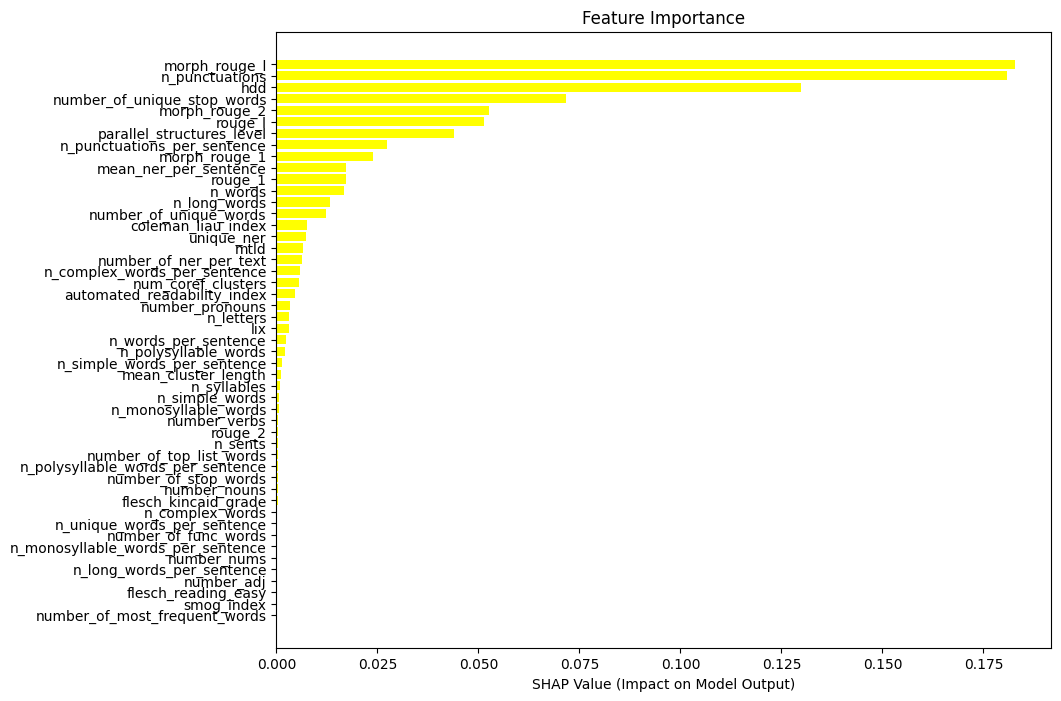

In [275]:
import shap
explainer_rf_equal = shap.Explainer(best_equal_rf)
shap_values_rf_equal = explainer_rf_equal.shap_values(X_test_equal_scaled)

importance_rf_equal = pd.Series(np.abs(shap_values_rf_equal[0]).mean(axis=1), index=X_test_equal_scaled.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_rf_equal.index, importance_rf_equal.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

In [276]:
columns_correspondence = {
    'n_letters': 'количество букв', 
    'n_syllables': "количество слогов",
    'n_words_per_sentence': "количество слов в предложении",
    'n_simple_words': "количество простых слов", 
    'n_simple_words_per_sentence': "количество простых слов в предложении", 
    'n_monosyllable_words': "количество односложных слов",
    'n_monosyllable_words_per_sentence': "количество односложных слов в предложении", 
    'n_polysyllable_words': "количество многосложных слов",
    'n_polysyllable_words_per_sentence': "количество многосложных слов в предложении", 
    'n_long_words': "количество длинных слов",
    'n_long_words_per_sentence': "количество длинных слов в предложении", 
    'n_complex_words': "количество сложных слов",
    'n_complex_words_per_sentence': "количество сложных слов в предложении", 
    'n_unique_words_per_sentence': "количество уникальных слов в предложении", 
    'n_sents': "количество предложений", 
    'n_punctuations': "количество знаков препинания",
    'n_punctuations_per_sentence': "количество знаков препинания в предложении", 
    'flesch_kincaid_grade': "индекс Флеша-Кинкейда",
    'flesch_reading_easy': "индекс удобочитаемости Флеша", 
    'coleman_liau_index': "индекс Колман-Лиау", 
    'smog_index': "индекс SMOG",
    'automated_readability_index': "автоматический индекс удобочитаемости", 
    'lix': "LIX",
    'mtld': "MTLD",
    'hdd': "HD-D",
    'number_of_unique_words': "количество уникальных слов", 
    'number_of_top_list_words': "количество наиболее частотных лемм",
    'number_of_stop_words': "количество стоп-слов", 
    'number_of_most_frequent_words': "количество наиболее частотных слов",
    'number_of_unique_stop_words': "количество уникальных стоп-слов", 
    'unique_ner': "количество уникальных именованных сущностей", 
    'number_of_ner_per_text': "количество именованных сущностей в тексте",
    'mean_ner_per_sentence': "среднее количество именованных сущностей в предложении", 
    'number_nouns': "количество существительных", 
    'number_verbs': "количество глаголов", 
    'number_adj': "количество прилагательных",
    'number_pronouns': "количество местоимений", 
    'number_nums': "количество числительных", 
    'number_of_func_words': "количество служебных слов", 
    'rouge_1': "ROUGE-1",
    'rouge_2': "ROUGE-2", 
    'rouge_l': "ROUGE-L", 
    'parallel_structures_level': "показатель синтаксического параллелизма", 
    'morph_rouge_1': "POS ROUGE-1",
    'morph_rouge_2': "POS ROUGE-2", 
    'morph_rouge_l': "POS ROUGE-L", 
    'num_coref_clusters': "количество кореферентных цепочек",
    'mean_cluster_length': "средняя длина кореферентных цепочек"
    }

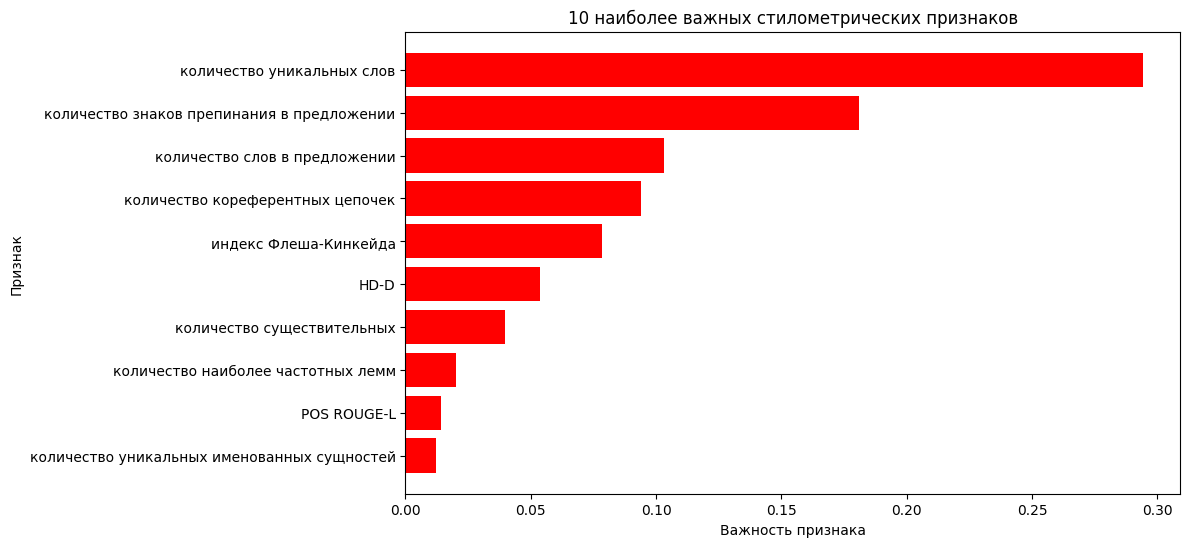

In [277]:
feature_importances_equal_rf = best_equal_rf.feature_importances_

# feature_names_equal_rf = X_test_equal_scaled.columns
feature_names_equal_rf = list(columns_correspondence.values())

combined_equal_rf = zip(feature_names_equal_rf, feature_importances_equal_rf)

# Sort combined list based on feature importance
sorted_combined_equal_rf = sorted(combined_equal_rf, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf = zip(*sorted_combined_equal_rf)

# Slice the lists to include only the top 10 features
top_10_feature_names_equal_rf = sorted_feature_names_equal_rf[:10]
top_10_feature_importances_equal_rf = sorted_feature_importances_equal_rf[:10]

# Plot the sorted feature importances for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_feature_names_equal_rf, top_10_feature_importances_equal_rf, color='red')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('10 наиболее важных стилометрических признаков')
plt.gca().invert_yaxis()
plt.show()

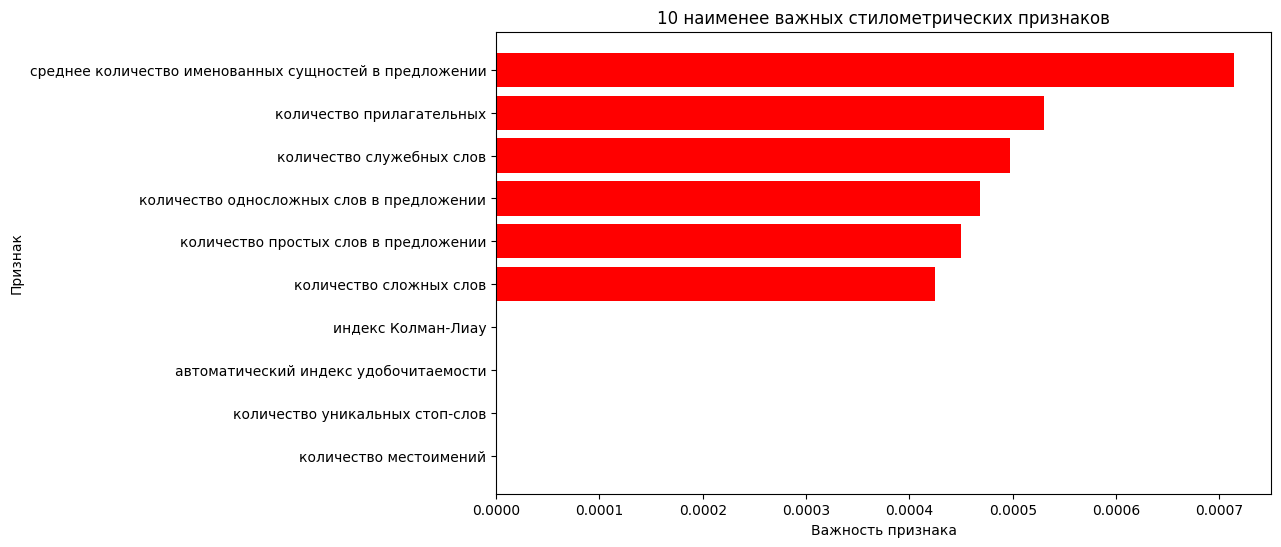

In [278]:
feature_importances_equal_rf = best_equal_rf.feature_importances_

# feature_names_equal_rf = X_test_equal_scaled.columns
feature_names_equal_rf = list(columns_correspondence.values())

combined_equal_rf = zip(feature_names_equal_rf, feature_importances_equal_rf)

# Sort combined list based on feature importance
sorted_combined_equal_rf = sorted(combined_equal_rf, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf = zip(*sorted_combined_equal_rf)

# Slice the lists to include only the top 10 features
top_10_feature_names_equal_rf = sorted_feature_names_equal_rf[-10:]
top_10_feature_importances_equal_rf = sorted_feature_importances_equal_rf[-10:]

# Plot the sorted feature importances for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_feature_names_equal_rf, top_10_feature_importances_equal_rf, color='red')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('10 наименее важных стилометрических признаков')
plt.gca().invert_yaxis()
plt.show()

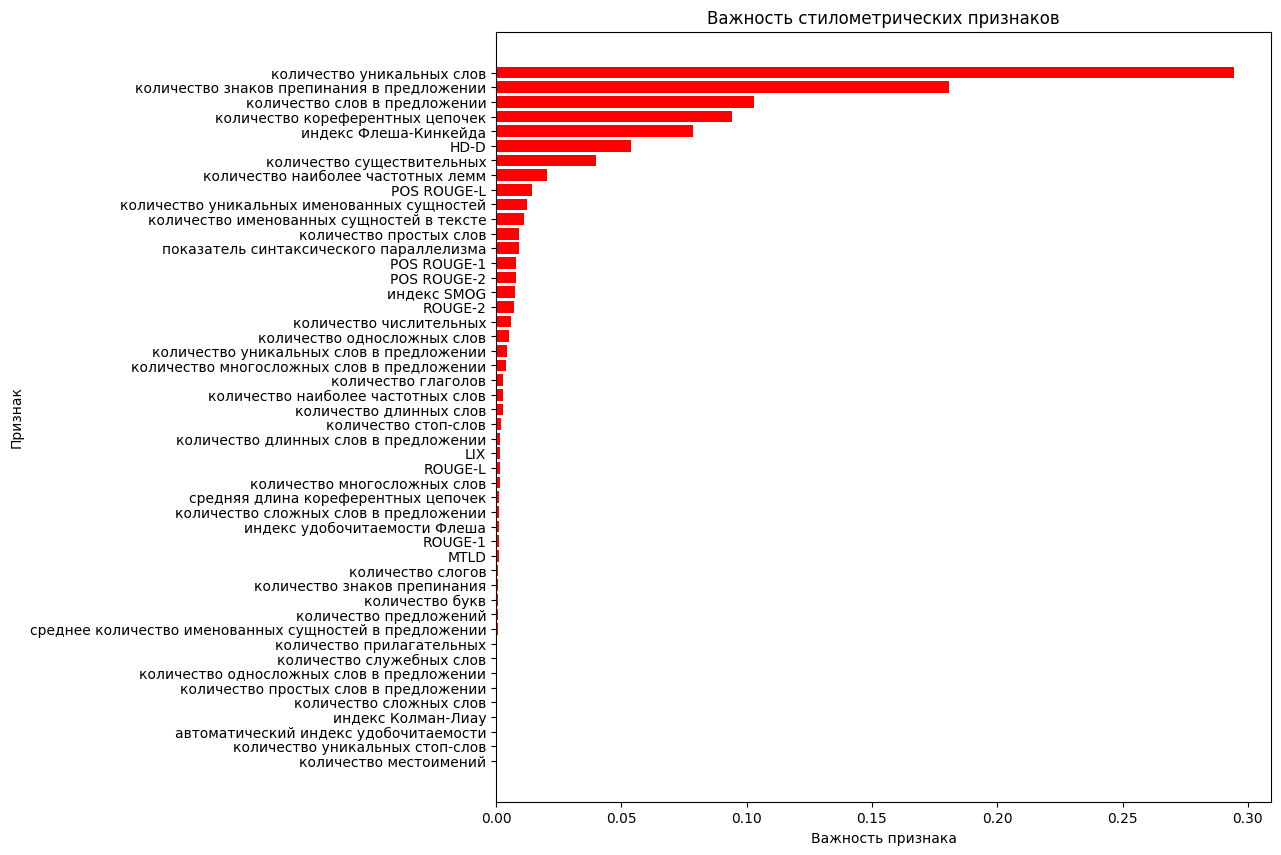

In [279]:
feature_importances_equal_rf = best_equal_rf.feature_importances_

# feature_names_equal_rf = X_test_equal_scaled.columns
feature_names_equal_rf = list(columns_correspondence.values())

combined_equal_rf = zip(feature_names_equal_rf, feature_importances_equal_rf)

# Sort combined list based on feature importance
sorted_combined_equal_rf = sorted(combined_equal_rf, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf = zip(*sorted_combined_equal_rf)

# Plot the sorted feature importances
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names_equal_rf, sorted_feature_importances_equal_rf, color='red')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность стилометрических признаков')
plt.gca().invert_yaxis()
plt.show()

### **Random Forest: different**

In [280]:
rf_different = RandomForestClassifier(random_state=42)

grid_search_different = GridSearchCV(estimator=rf_different, param_grid=param_grid_rf, cv=5, scoring='f1_macro')
grid_search_different.fit(X_val_different_scaled, y_val_different)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_macro')

In [281]:
best_params_different = grid_search_different.best_params_
best_score_different = grid_search_different.best_score_

print(f'These are the best parameters: {best_params_different}')
print(f'This is the best score: {best_score_different}')

These are the best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
This is the best score: 0.9814001003875695


In [282]:
best_different_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=42)
best_different_rf.fit(X_train_different_scaled, y_train_different)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=10,
                       random_state=42)

In [283]:
y_pred_different = best_different_rf.predict(X_test_different_scaled)
print("Classification Report:")
print(classification_report(y_test_different, y_pred_different))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       124
           1       0.97      0.95      0.96       148

    accuracy                           0.96       272
   macro avg       0.96      0.96      0.96       272
weighted avg       0.96      0.96      0.96       272



In [284]:
explainer_different_rf = shap.Explainer(best_different_rf)
shap_values_different_rf = explainer_different_rf.shap_values(X_test_different_scaled)

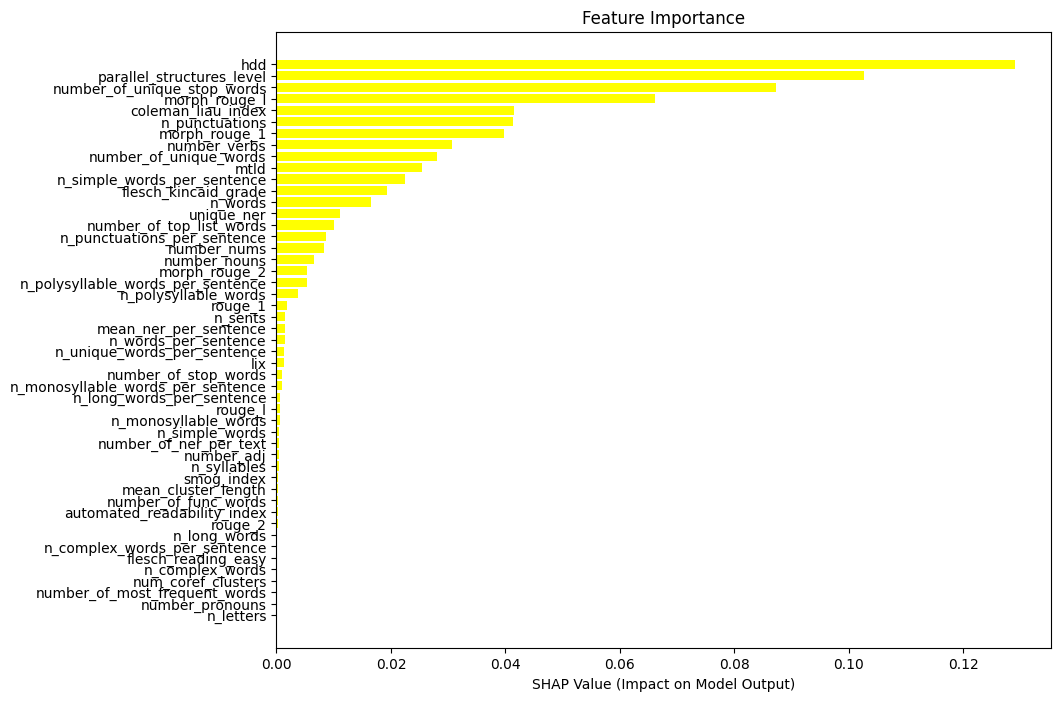

In [285]:
importance_different_df = pd.Series(np.abs(shap_values_different_rf[0]).mean(axis=1), index=X_test_different_scaled.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_different_df.index, importance_different_df.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

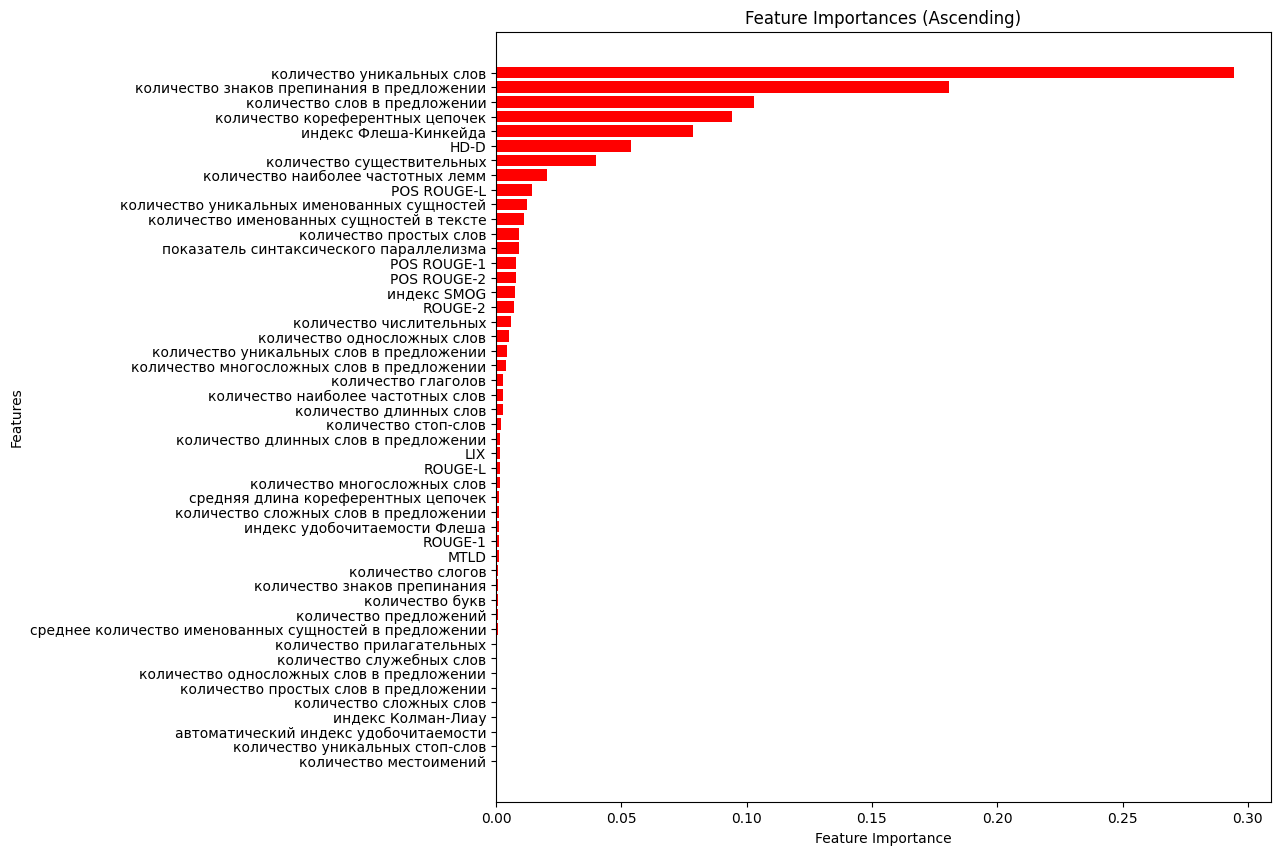

In [286]:
feature_importances_different_rf = best_different_rf.feature_importances_

feature_names_different_rf = list(columns_correspondence.values())

combined = zip(feature_names_equal_rf, feature_importances_equal_rf)

# Sort combined list based on feature importance
sorted_combined_different = sorted(combined, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_rf, sorted_feature_importances_different_rf = zip(*sorted_combined_different)

# Plot the sorted feature importances
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names_different_rf, sorted_feature_importances_different_rf, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

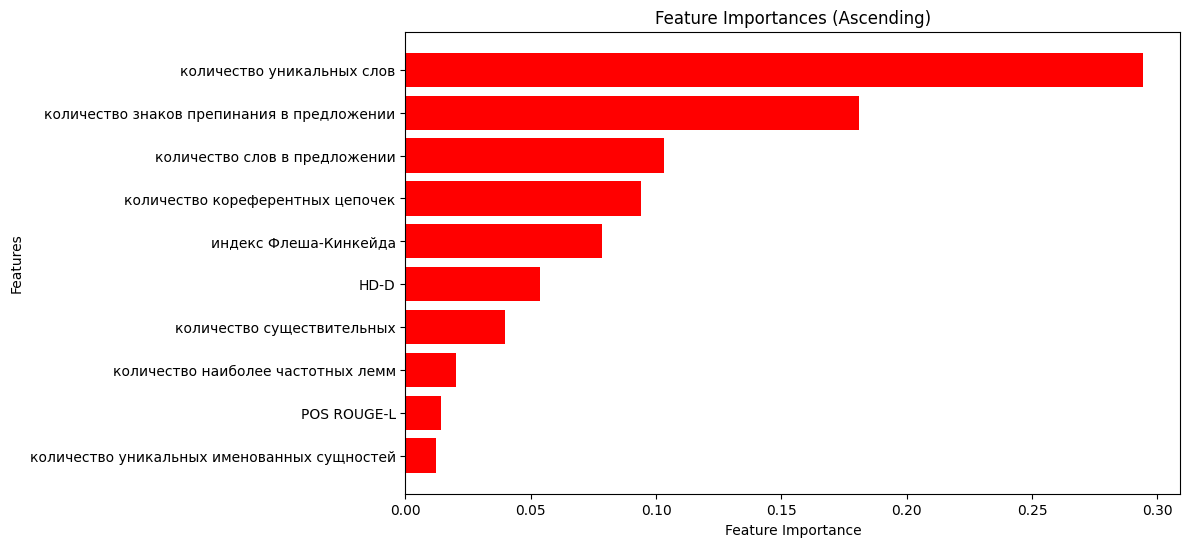

In [287]:
feature_importances_different_rf = best_different_rf.feature_importances_

feature_names_different_rf = list(columns_correspondence.values())

combined = zip(feature_names_equal_rf, feature_importances_equal_rf)

# Sort combined list based on feature importance
sorted_combined_different = sorted(combined, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_rf, sorted_feature_importances_different_rf = zip(*sorted_combined_different)

# Slice the lists to include only the top 10 features
top_10_feature_names_different_rf = sorted_feature_names_different_rf[:10]
top_10_feature_importances_different_rf = sorted_feature_importances_different_rf[:10]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_feature_names_different_rf, top_10_feature_importances_different_rf, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

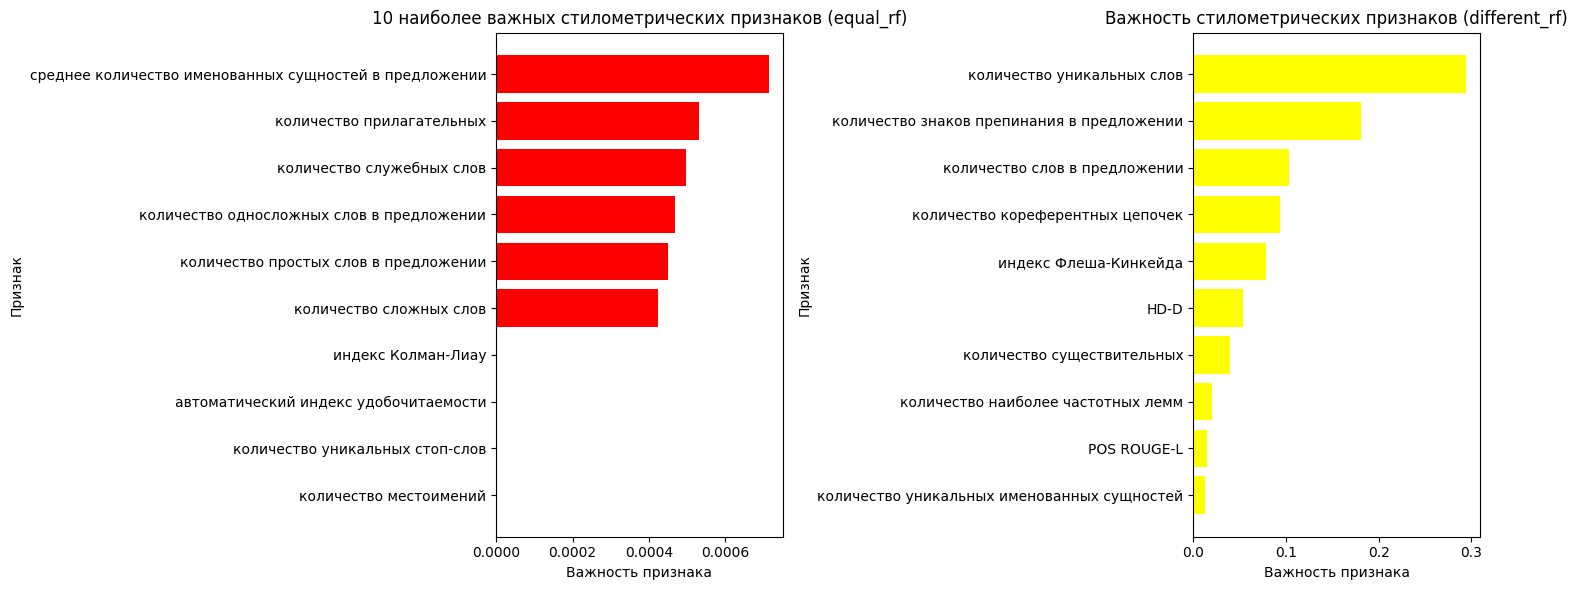

In [288]:
import matplotlib.pyplot as plt

# First subplot for the top 10 important features with equal_rf
plt.figure(figsize=(15, 6))

# Subplot for the equal_rf model
plt.subplot(1, 2, 1)
plt.barh(top_10_feature_names_equal_rf, top_10_feature_importances_equal_rf, color='red')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('10 наиболее важных стилометрических признаков (equal_rf)')
plt.gca().invert_yaxis()

# Second subplot for the sorted feature importances with different_rf
plt.subplot(1, 2, 2)
plt.barh(top_10_feature_names_different_rf, top_10_feature_importances_different_rf, color='yellow')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность стилометрических признаков (different_rf)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


### **CatBoost: equal**

In [289]:
catboost_params = {'depth': [4, 6, 8],
                   'learning_rate': [0.01, 0.05, 0.1]}

In [290]:
catboost_model_equal = CatBoostClassifier(verbose=False)

catboost_grid_equal = GridSearchCV(catboost_model_equal, catboost_params, cv=3, scoring='f1_macro')
catboost_grid_equal.fit(X_val_equal_scaled, y_val_equal)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x30ebf13d0>,
             param_grid={'depth': [4, 6, 8],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='f1_macro')

In [291]:
best_catboost_params_equal = catboost_grid_equal.best_params_
best_catboost_score_equal = catboost_grid_equal.best_score_

print(f'These are the best parameters: {best_catboost_params_equal}')
print(f'This is the best score: {best_catboost_score_equal}')

These are the best parameters: {'depth': 4, 'learning_rate': 0.05}
This is the best score: 0.9795335712672903


In [292]:
catboost_model_equal.set_params(**best_catboost_params_equal)
catboost_model_equal.fit(X_train_equal_scaled, y_train_equal)
catboost_pred_equal = catboost_model_equal.predict(X_test_equal_scaled)

print(classification_report(y_test_equal, catboost_pred_equal))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       251
           1       0.98      0.98      0.98       291

    accuracy                           0.98       542
   macro avg       0.98      0.98      0.98       542
weighted avg       0.98      0.98      0.98       542



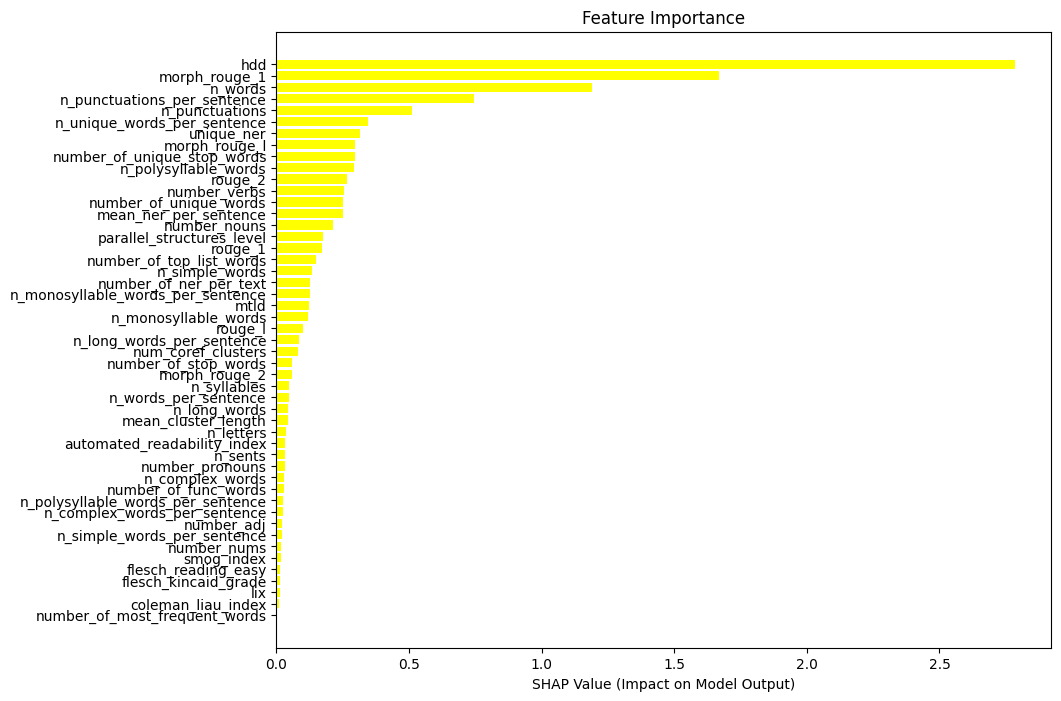

In [293]:
explainer_catboost_equal = shap.Explainer(catboost_model_equal)
shap_values_catboost_equal = explainer_catboost_equal.shap_values(X_test_equal_scaled)

importance_catboost_equal = pd.Series(np.abs(shap_values_catboost_equal).mean(axis=0), index=X_test_equal_scaled.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_catboost_equal.index, importance_catboost_equal.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

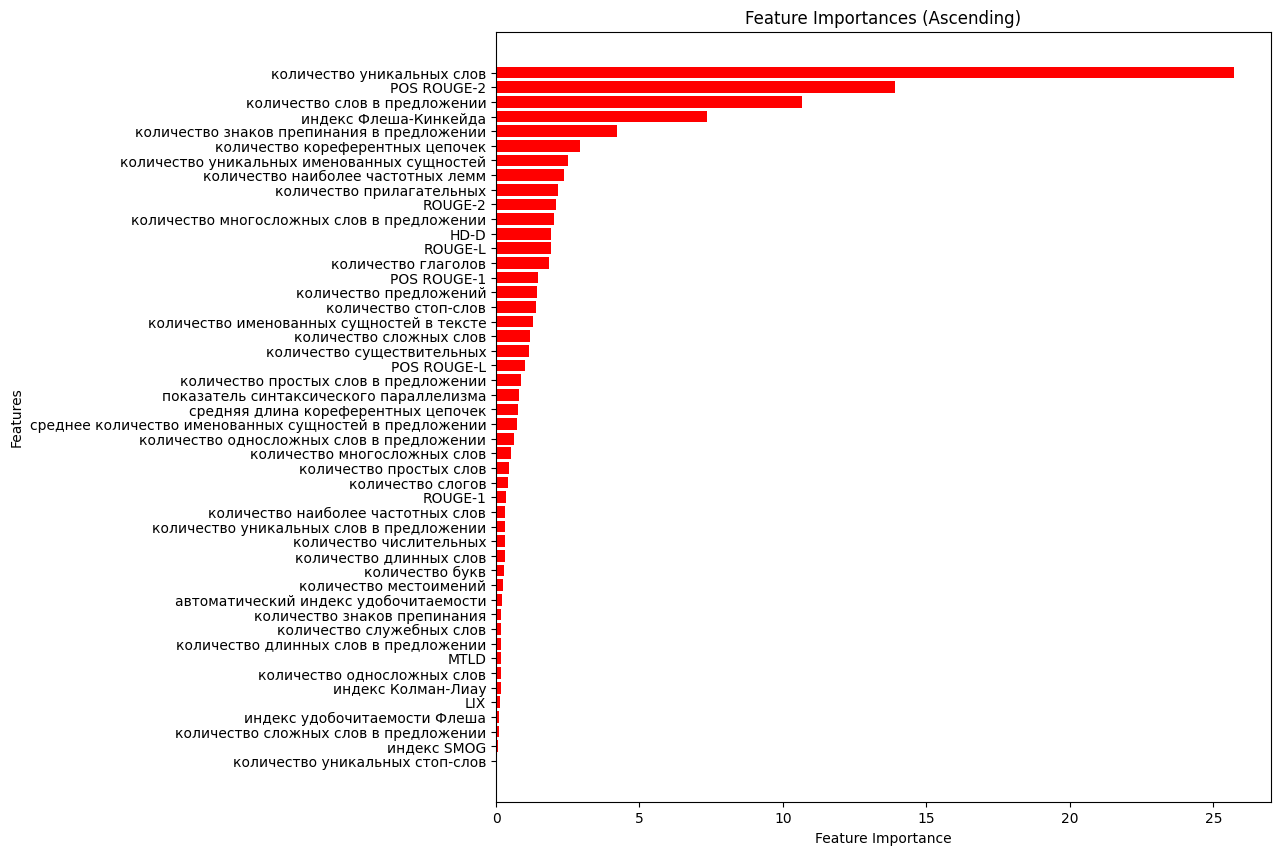

In [294]:
feature_importances_equal_catboost = catboost_model_equal.feature_importances_

# feature_names_equal_catboost = X_test_equal_scaled.columns
feature_names_equal_catboost = list(columns_correspondence.values())

combined_equal_catboost = zip(feature_names_equal_catboost, feature_importances_equal_catboost)

# Sort combined list based on feature importance
sorted_combined_equal_catboost = sorted(combined_equal_catboost, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_catboost, sorted_feature_importances_equal_catboost = zip(*sorted_combined_equal_catboost)

# Plot the sorted feature importances
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names_equal_catboost, sorted_feature_importances_equal_catboost, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

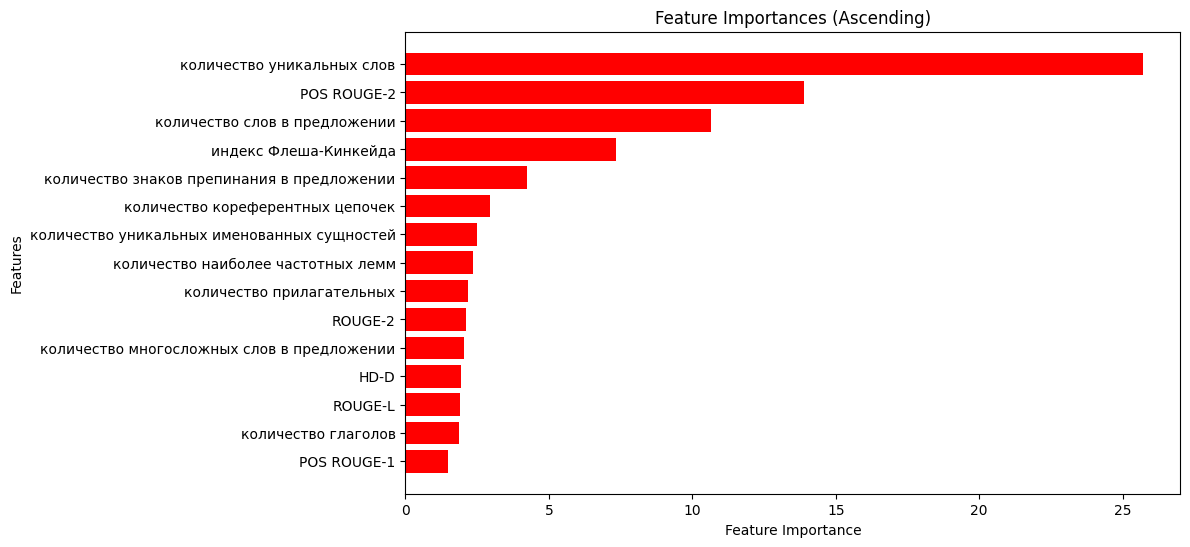

In [295]:
feature_importances_equal_catboost = catboost_model_equal.feature_importances_

# feature_names_equal_catboost = X_test_equal_scaled.columns
feature_names_equal_catboost = list(columns_correspondence.values())

combined_equal_catboost = zip(feature_names_equal_catboost, feature_importances_equal_catboost)

# Sort combined list based on feature importance
sorted_combined_equal_catboost = sorted(combined_equal_catboost, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_catboost, sorted_feature_importances_equal_catboost = zip(*sorted_combined_equal_catboost)

# Slice the lists to include only the top 10 features
top_10_feature_names_equal_catboost = sorted_feature_names_equal_catboost[:15]
top_10_feature_importances_equal_catboost = sorted_feature_importances_equal_catboost[:15]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_feature_names_equal_catboost, top_10_feature_importances_equal_catboost, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

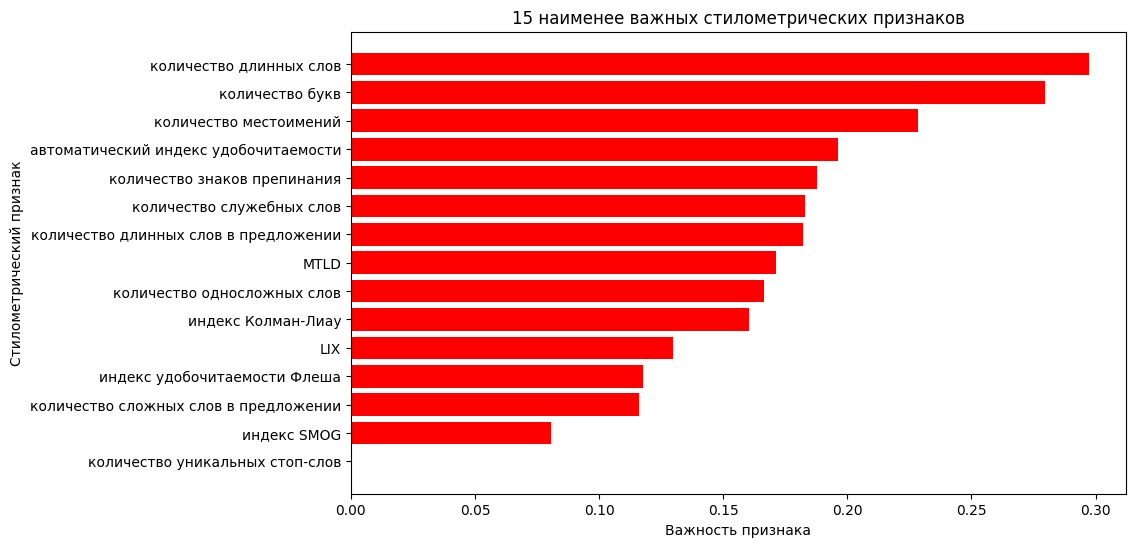

In [296]:
feature_importances_equal_catboost = catboost_model_equal.feature_importances_

# feature_names_equal_catboost = X_test_equal_scaled.columns
feature_names_equal_catboost = list(columns_correspondence.values())

combined_equal_catboost = zip(feature_names_equal_catboost, feature_importances_equal_catboost)

# Sort combined list based on feature importance
sorted_combined_equal_catboost = sorted(combined_equal_catboost, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_catboost, sorted_feature_importances_equal_catboost = zip(*sorted_combined_equal_catboost)

# Slice the lists to include only the top 10 features
top_10_least_important_feature_names_equal_catboost = sorted_feature_names_equal_catboost[-15:]
top_10_least_important_feature_importances_equal_catboost = sorted_feature_importances_equal_catboost[-15:]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_least_important_feature_names_equal_catboost, top_10_least_important_feature_importances_equal_catboost, color='red')
plt.xlabel('Важность признака')
plt.ylabel('Стилометрический признак')
plt.title('15 наименее важных стилометрических признаков')
plt.gca().invert_yaxis()
plt.show()

### **Catboost: different**

In [297]:
catboost_model_different = CatBoostClassifier(verbose=False)

catboost_grid_different = GridSearchCV(catboost_model_different, catboost_params, cv=3, scoring='f1_macro')
catboost_grid_different.fit(X_val_different_scaled, y_val_different)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x323616e50>,
             param_grid={'depth': [4, 6, 8],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='f1_macro')

In [299]:
best_catboost_params_different = catboost_grid_different.best_params_
best_catboost_score_different = catboost_grid_different.best_score_

print(f'These are the best parameters: {best_catboost_params_different}')
print(f'This is the best score: {best_catboost_score_different}')

These are the best parameters: {'depth': 4, 'learning_rate': 0.01}
This is the best score: 0.9663737119140886


In [300]:
catboost_model_different.set_params(**best_catboost_params_different)
catboost_model_different.fit(X_train_different_scaled, y_train_different)
catboost_pred_different = catboost_model_different.predict(X_test_different_scaled)

print(classification_report(y_test_different, catboost_pred_different))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       124
           1       0.97      0.99      0.98       148

    accuracy                           0.98       272
   macro avg       0.98      0.98      0.98       272
weighted avg       0.98      0.98      0.98       272



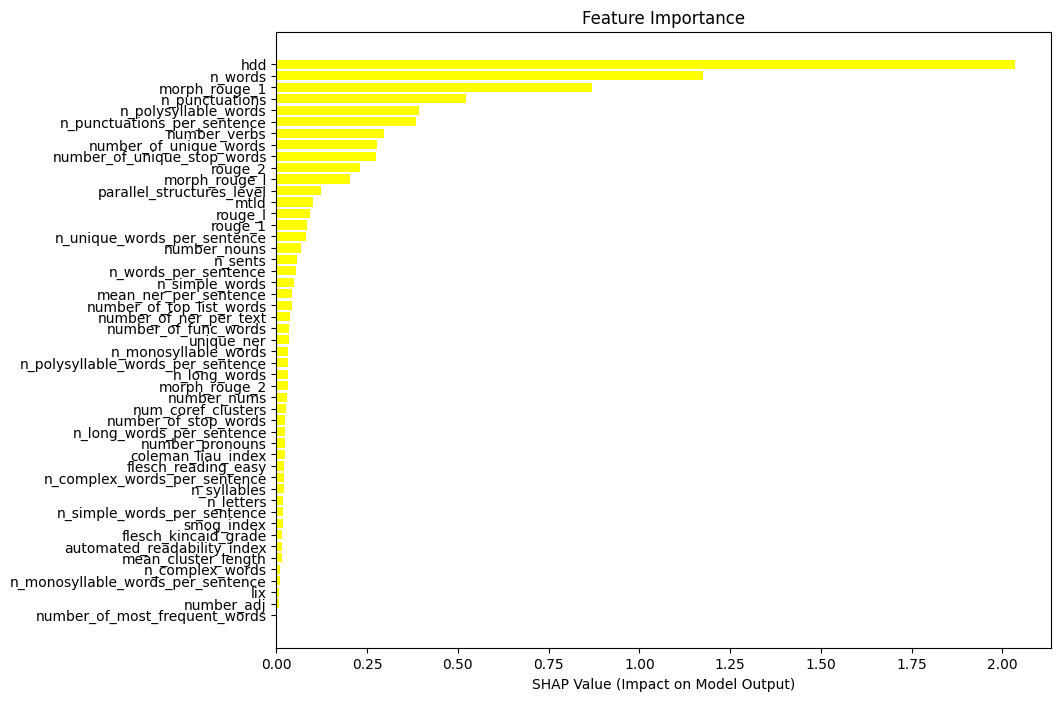

In [301]:
explainer_catboost_different = shap.Explainer(catboost_model_different)
shap_values_catboost_different = explainer_catboost_different.shap_values(X_test_different_scaled)

importance_catboost_different = pd.Series(np.abs(shap_values_catboost_different).mean(axis=0), index=X_test_different_scaled.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_catboost_different.index, importance_catboost_different.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

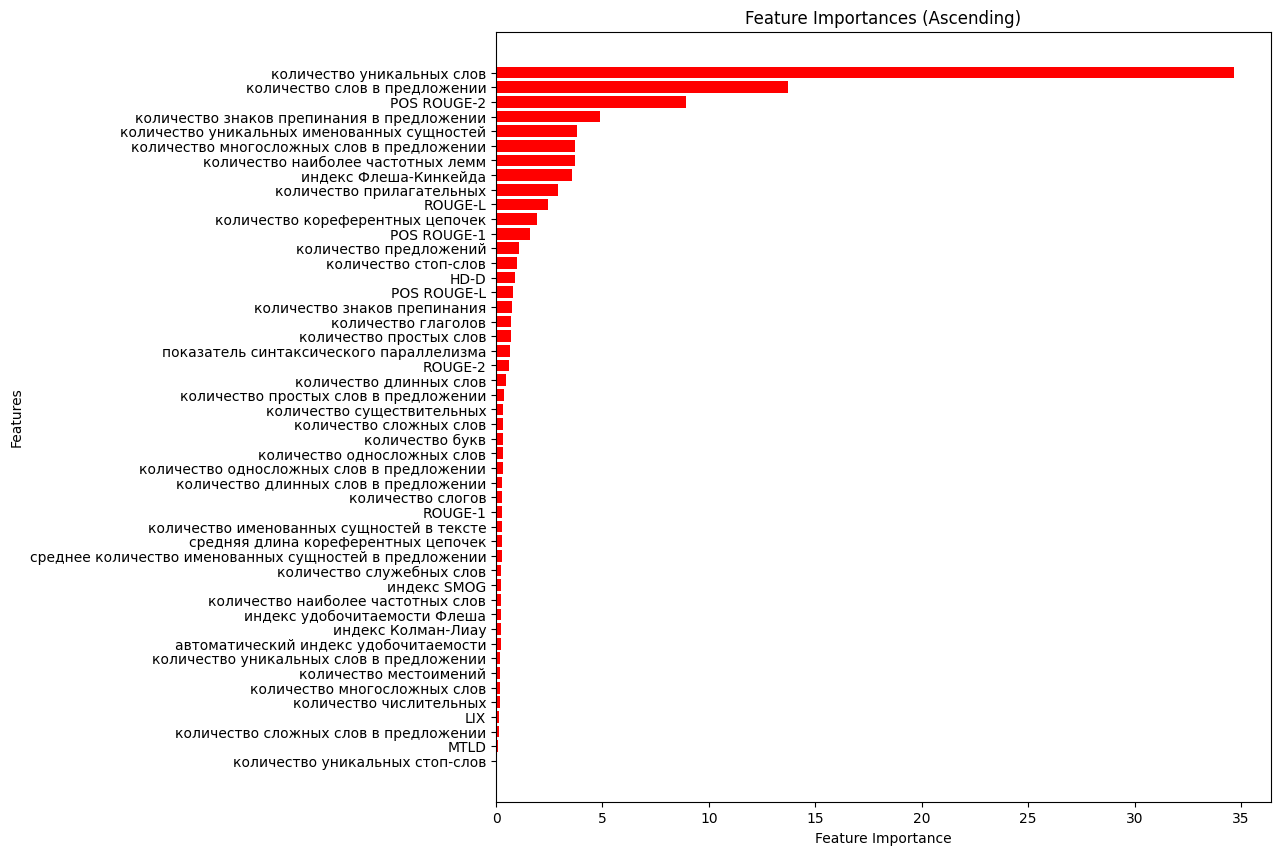

In [302]:
feature_importances_different_catboost = catboost_model_different.feature_importances_

feature_names_different_catboost = list(columns_correspondence.values())

combined_different_catboost = zip(feature_names_different_catboost, feature_importances_different_catboost)

# Sort combined list based on feature importance
sorted_combined_different_catboost = sorted(combined_different_catboost, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_catboost, sorted_feature_importances_different_catboost = zip(*sorted_combined_different_catboost)

# Plot the sorted feature importances
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names_different_catboost, sorted_feature_importances_different_catboost, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

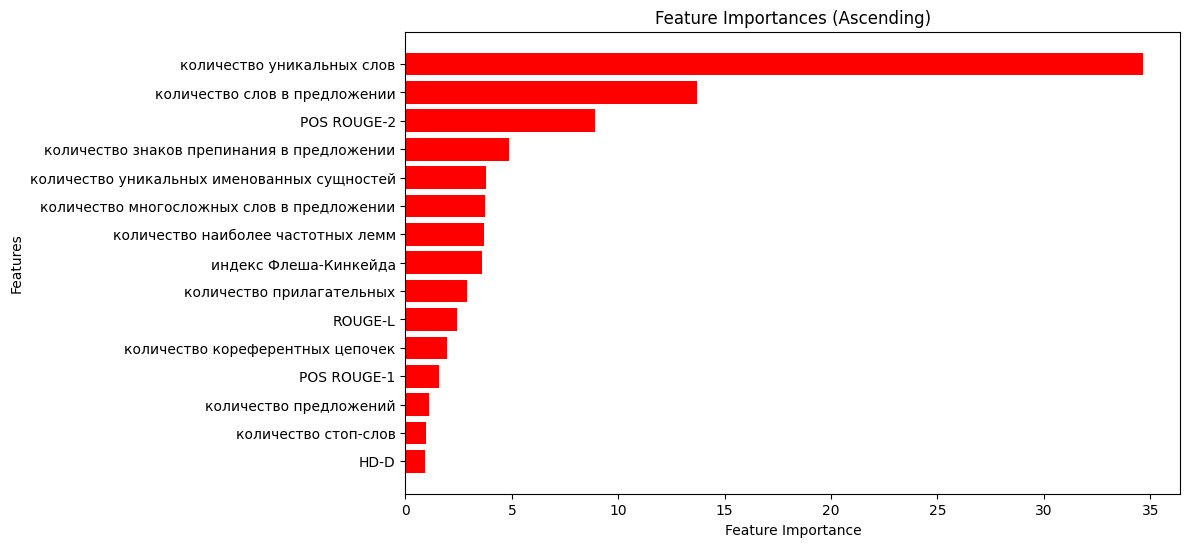

In [303]:
feature_importances_different_catboost = catboost_model_different.feature_importances_

feature_names_different_catboost = list(columns_correspondence.values())

combined_different_catboost = zip(feature_names_different_catboost, feature_importances_different_catboost)

# Sort combined list based on feature importance
sorted_combined_different_catboost = sorted(combined_different_catboost, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_catboost, sorted_feature_importances_different_catboost = zip(*sorted_combined_different_catboost)

top_10_feature_names_different_catboost = sorted_feature_names_different_catboost[:15]
top_10_feature_importances_different_catboost = sorted_feature_importances_different_catboost[:15]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_feature_names_different_catboost, top_10_feature_importances_different_catboost, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

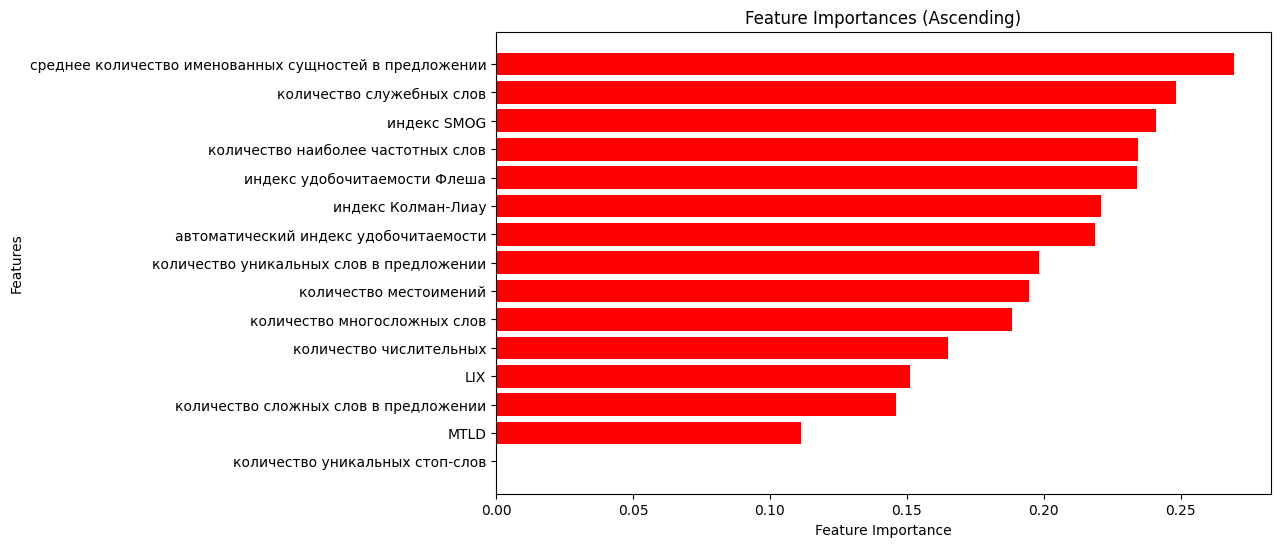

In [304]:
feature_importances_different_catboost = catboost_model_different.feature_importances_

feature_names_different_catboost = list(columns_correspondence.values())

combined_different_catboost = zip(feature_names_different_catboost, feature_importances_different_catboost)

# Sort combined list based on feature importance
sorted_combined_different_catboost = sorted(combined_different_catboost, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_catboost, sorted_feature_importances_different_catboost = zip(*sorted_combined_different_catboost)

top_10_least_important_feature_names_different_catboost = sorted_feature_names_different_catboost[-15:]
top_10_least_important_feature_importances_different_catboost = sorted_feature_importances_different_catboost[-15:]

# Plot the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_10_least_important_feature_names_different_catboost, top_10_least_important_feature_importances_different_catboost, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

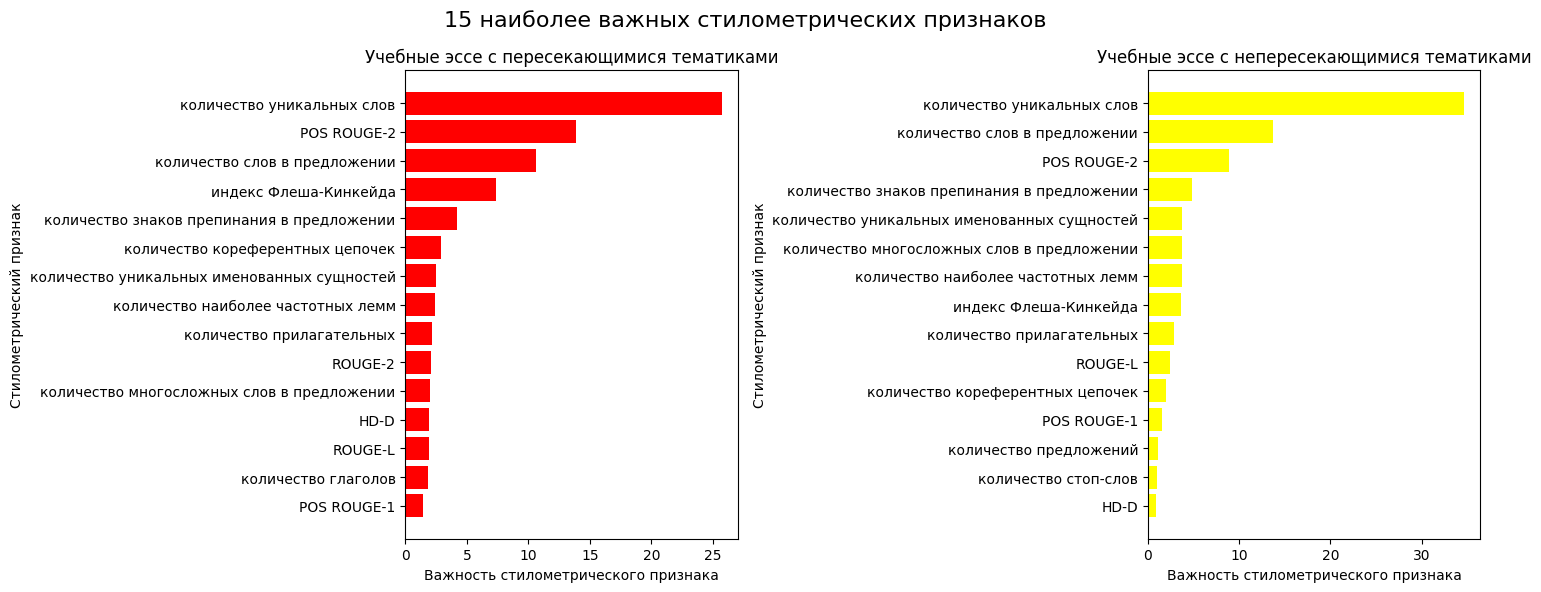

In [305]:
# First subplot for the top 10 important features with equal_rf
plt.figure(figsize=(15, 6))

# Subplot for the equal_rf model
plt.subplot(1, 2, 1)
plt.barh(top_10_feature_names_equal_catboost, top_10_feature_importances_equal_catboost, color='red')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Учебные эссе с пересекающимися тематиками')
plt.gca().invert_yaxis()

# Second subplot for the sorted feature importances with different_rf
plt.subplot(1, 2, 2)
plt.barh(top_10_feature_names_different_catboost, top_10_feature_importances_different_catboost, color='yellow')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Учебные эссе с непересекающимися тематиками')
plt.gca().invert_yaxis()

plt.suptitle('15 наиболее важных стилометрических признаков', fontsize=16)
plt.tight_layout()
plt.show()

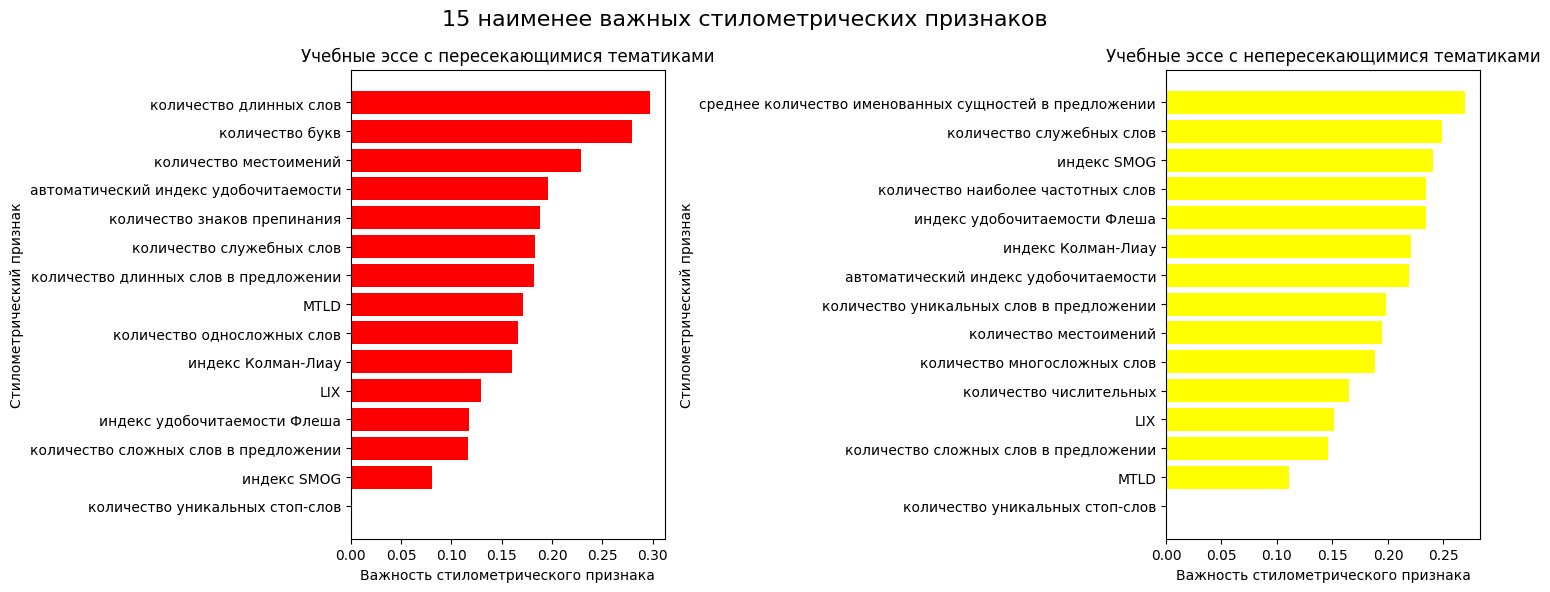

In [306]:
# First subplot for the top 10 important features with equal_rf
plt.figure(figsize=(15, 6))

# Subplot for the equal_rf model
plt.subplot(1, 2, 1)
plt.barh(top_10_least_important_feature_names_equal_catboost, top_10_least_important_feature_importances_equal_catboost, color='red')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Учебные эссе с пересекающимися тематиками')
plt.gca().invert_yaxis()

# Second subplot for the sorted feature importances with different_rf
plt.subplot(1, 2, 2)
plt.barh(top_10_least_important_feature_names_different_catboost, top_10_least_important_feature_importances_different_catboost, color='yellow')
plt.xlabel('Важность стилометрического признака')
plt.ylabel('Стилометрический признак')
plt.title('Учебные эссе с непересекающимися тематиками')
plt.gca().invert_yaxis()

plt.suptitle('15 наименее важных стилометрических признаков', fontsize=16)
plt.tight_layout()
plt.show()

### **XGBoost Classifier: equal**

In [307]:
xgboost_params = {'max_depth': [4, 6, 8],
                  'learning_rate': [0.01, 0.05, 0.1]}

In [308]:
xgboost_model_equal = XGBClassifier()

xgboost_grid_equal = GridSearchCV(xgboost_model_equal, xgboost_params, cv=3)
xgboost_grid_equal.fit(X_val_equal_scaled, y_val_equal)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8]})

In [309]:
best_xgboost_params_equal = xgboost_grid_equal.best_params_
best_xgboost_score_equal = xgboost_grid_equal.best_score_

print(f'These are the best parameters: {best_xgboost_params_equal}')
print(f'This is the best score: {best_xgboost_score_equal}')

These are the best parameters: {'learning_rate': 0.1, 'max_depth': 4}
This is the best score: 0.9593922651933701


In [310]:
xgboost_model_equal.set_params(**best_xgboost_params_equal)
xgboost_model_equal.fit(X_train_equal_scaled, y_train_equal)
xgboost_pred_equal = xgboost_model_equal.predict(X_test_equal_scaled)

print(classification_report(y_test_equal, xgboost_pred_equal))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       251
           1       0.99      0.96      0.97       291

    accuracy                           0.97       542
   macro avg       0.97      0.97      0.97       542
weighted avg       0.97      0.97      0.97       542



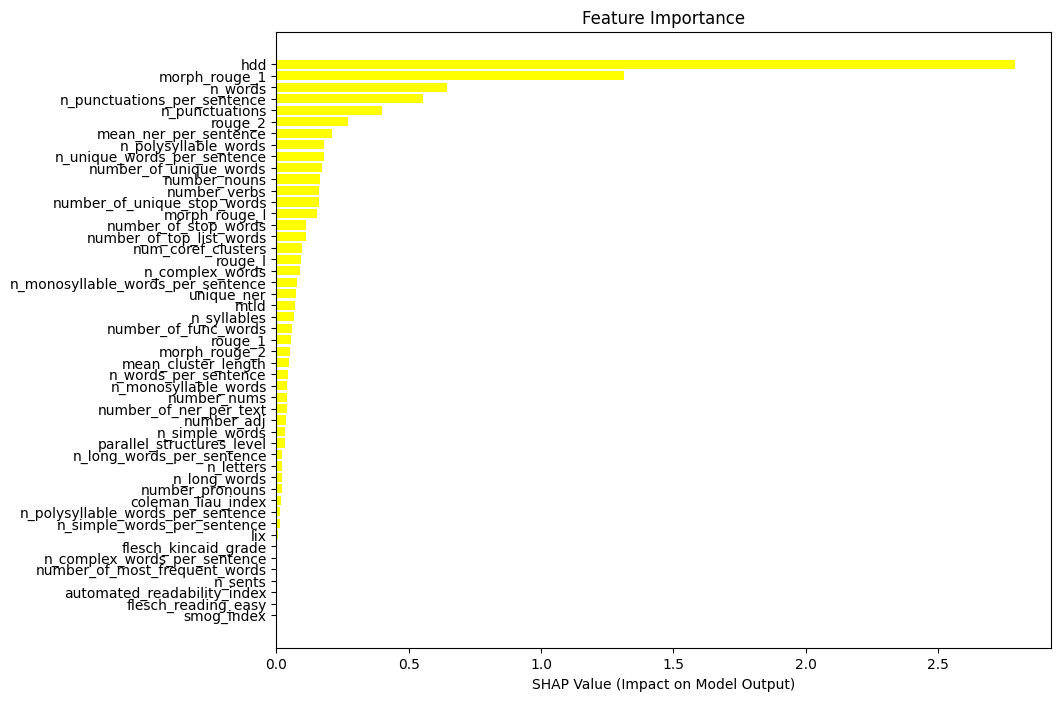

In [311]:
explainer_equal_xgb = shap.Explainer(xgboost_model_equal)
shap_values_equal_xgb = explainer_equal_xgb.shap_values(X_test_equal_scaled)

importance_equal_xgb = pd.Series(np.abs(shap_values_equal_xgb).mean(axis=0), index=X_test_equal_scaled.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_equal_xgb.index, importance_equal_xgb.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

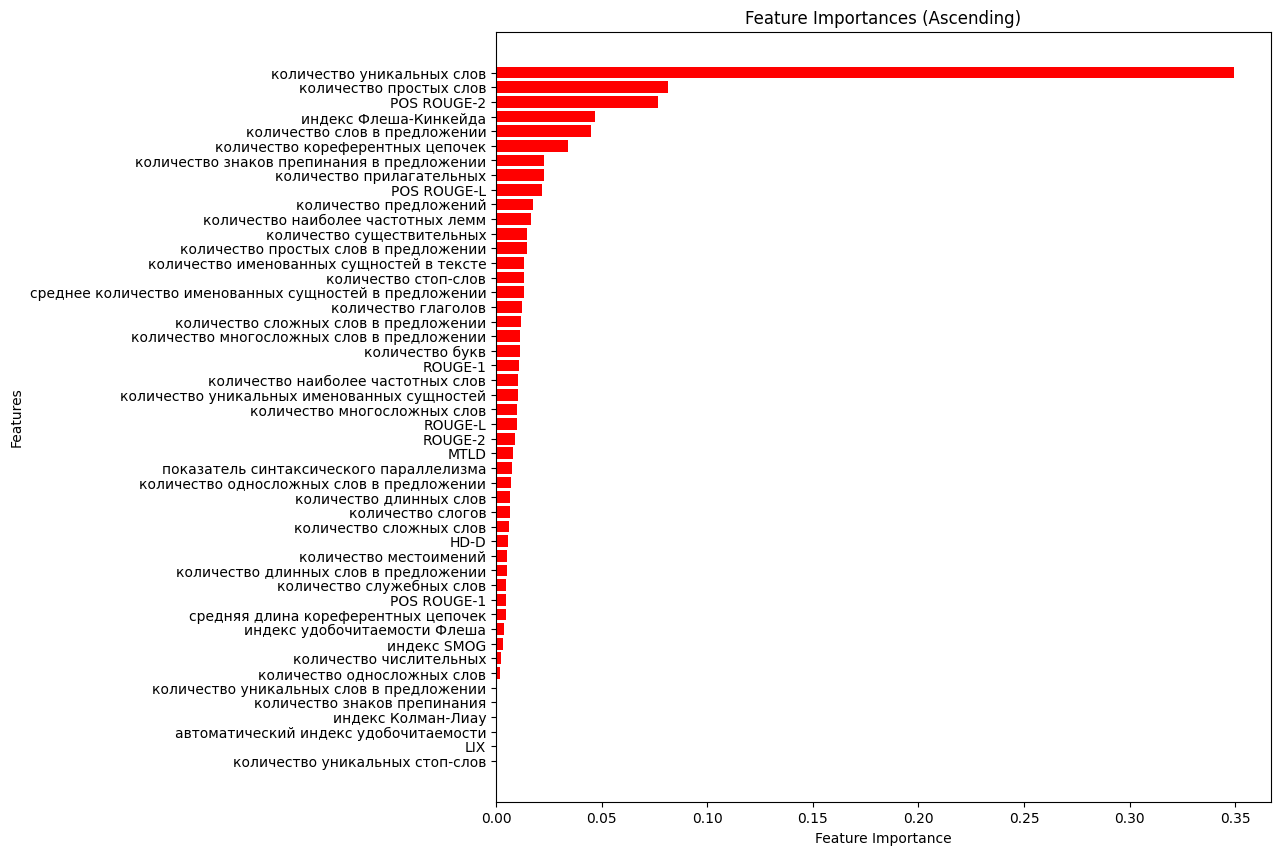

In [312]:
feature_importances_equal_xgb = xgboost_model_equal.feature_importances_

feature_names_equal_xgb = list(columns_correspondence.values())

combined_equal_xgb = zip(feature_names_equal_xgb, feature_importances_equal_xgb)

# Sort combined list based on feature importance
sorted_combined_equal_xgb  = sorted(combined_equal_xgb, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_equal_xgb, sorted_feature_importances_equal_xgb = zip(*sorted_combined_equal_xgb)

# Plot the sorted feature importances
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names_equal_xgb, sorted_feature_importances_equal_xgb, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()

### **XGBoost: different**

In [313]:
xgboost_model_different = XGBClassifier()

xgboost_grid_different = GridSearchCV(xgboost_model_different, xgboost_params, cv=3)
xgboost_grid_different.fit(X_val_different_scaled, y_val_different)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8]})

In [314]:
best_xgboost_params_different = xgboost_grid_different.best_params_
best_xgboost_score_different = xgboost_grid_different.best_score_

print(f'These are the best parameters: {best_xgboost_params_different}')
print(f'This is the best score: {best_xgboost_score_different}')

These are the best parameters: {'learning_rate': 0.1, 'max_depth': 4}
This is the best score: 0.9484330484330484


In [315]:
xgboost_model_different.set_params(**best_xgboost_params_different)
xgboost_model_different.fit(X_train_different_scaled, y_train_different)
xgboost_pred_different = xgboost_model_different.predict(X_test_different_scaled)

print(classification_report(y_test_different, xgboost_pred_different))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       124
           1       0.97      0.98      0.97       148

    accuracy                           0.97       272
   macro avg       0.97      0.97      0.97       272
weighted avg       0.97      0.97      0.97       272



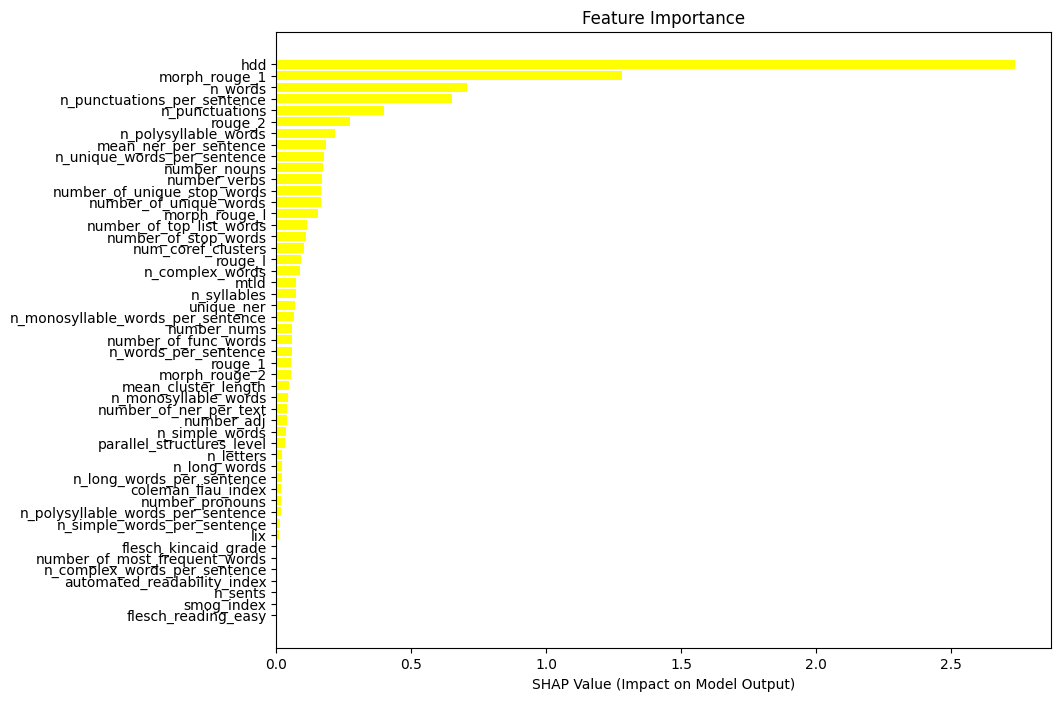

In [316]:
explainer_different_xgb = shap.Explainer(xgboost_model_different)
shap_values_different_xgb = explainer_equal_xgb.shap_values(X_test_different_scaled)

importance_different_xgb = pd.Series(np.abs(shap_values_different_xgb).mean(axis=0), index=X_test_different_scaled.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_different_xgb.index, importance_different_xgb.values, color='yellow')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('Feature Importance')

plt.show()

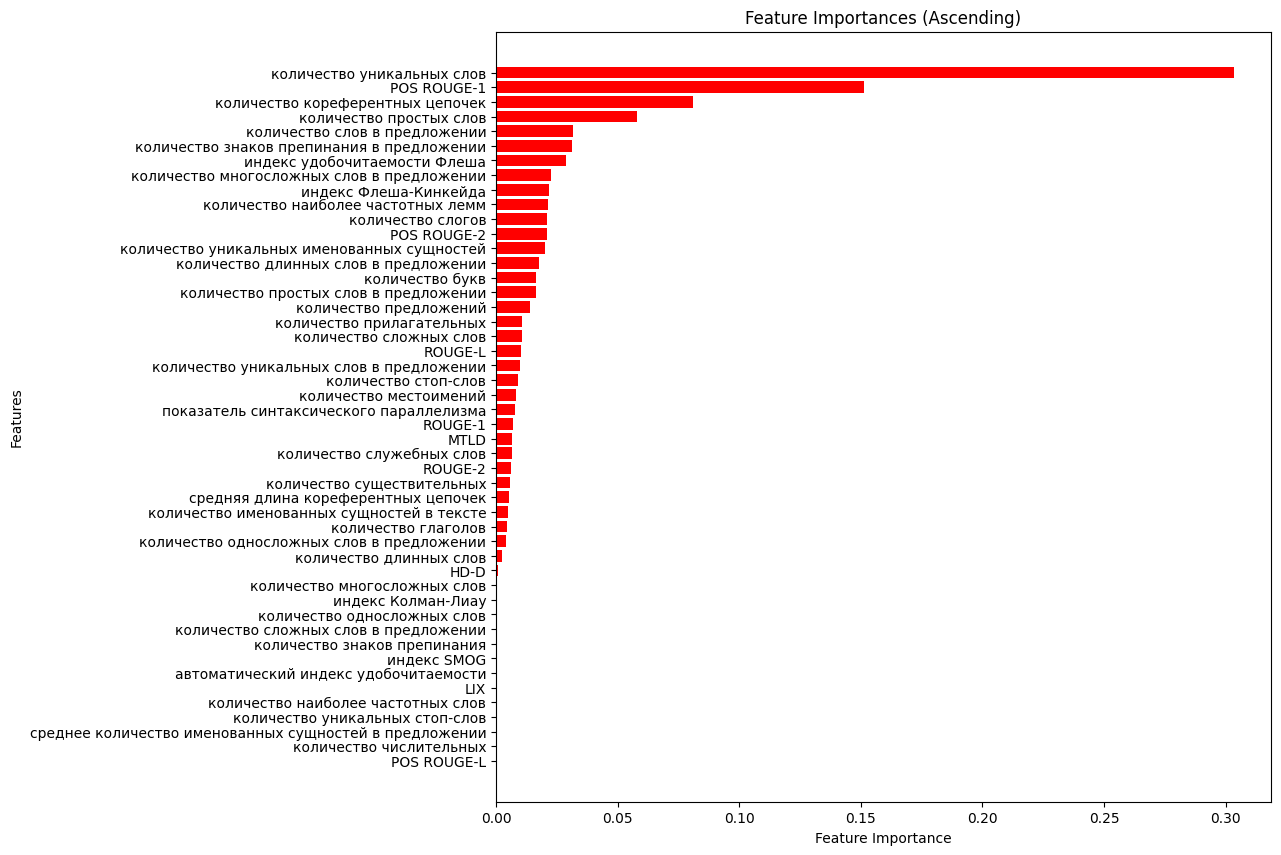

In [317]:
feature_importances_different_xgb = xgboost_model_different.feature_importances_

feature_names_different_xgb = list(columns_correspondence.values())

combined_different_xgb = zip(feature_names_different_xgb, feature_importances_different_xgb)

# Sort combined list based on feature importance
sorted_combined_different_xgb  = sorted(combined_different_xgb, key=lambda x: -x[1])

# Unzip sorted list into separate lists
sorted_feature_names_different_xgb, sorted_feature_importances_different_xgb = zip(*sorted_combined_different_xgb)

# Plot the sorted feature importances
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names_different_xgb, sorted_feature_importances_different_xgb, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Ascending)')
plt.gca().invert_yaxis()
plt.show()